# Project Name - *Netflix Movie and TV Show Analysis*

##### **Project Type**    - EDA/Regression/Classification/Unsupervised

## Github Link - https://github.com/faizan1343/Netflix-Movie-and-TV-Show-Analysis.git

# Project Summary
#### This project focuses on analyzing a dataset of Netflix movies and TV shows, sourced from Flixable, to uncover insights about content distribution, trends, and clustering based on text-based features. The dataset, reflecting Netflix's catalog as of 2019, highlights a significant increase in TV shows and a decrease in movies since 2010. The project involves performing comprehensive Exploratory Data Analysis (EDA) to understand content availability across different countries, investigate Netflix's strategic shift toward TV content, and cluster similar titles using unsupervised machine learning techniques. Key tasks include handling missing values and outliers, visualizing data through at least 15 meaningful charts (following Univariate, Bivariate, and Multivariate analysis), and experimenting with at least two clustering algorithms with hyperparameter tuning and cross-validation. The evaluation metrics will assess the clustering performance, and insights will be linked to potential business impacts, such as content strategy optimization and audience targeting.

## Problem Statement

#### Netflix's content library has undergone significant changes, with a reported tripling of TV shows and a reduction of over 2,000 movie titles since 2010, as per a 2018 Flixable report. This shift raises questions about content trends, regional preferences, and opportunities for personalized content recommendations. The objective of this project is to analyze the Netflix dataset to:





#### - Conduct Exploratory Data Analysis (EDA) to identify patterns, trends, and anomalies in the dataset, including content type distribution, regional availability, and temporal changes.



#### - Investigate whether Netflix has increasingly prioritized TV shows over movies in recent years and the implications of this shift.



#### - Examine content availability and preferences across different countries to understand regional differences.



#### - Apply unsupervised machine learning to cluster similar movies and TV shows based on text-based features (e.g., descriptions, genres) to enable content categorization and enhance recommendation systems.



#### - Develop at least two clustering models, evaluate their performance using appropriate metrics (e.g., silhouette score, Davies-Bouldin index), and optimize them through hyperparameter tuning and cross-validation.



#### - Provide actionable insights to support Netflix's content strategy, such as identifying underserved genres or regions, optimizing content acquisition, and improving user engagement through better content grouping. The project aims to deliver a robust, well-documented analysis with clear visualizations and a professional presentation of findings to inform strategic decision-making.

## Import Libraries

In [1]:
# Importing essential libraries for data analysis, visualization, and handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno  # For visualizing missing values

In [2]:
# Setting visualization style for consistency
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8')  # Using seaborn style for better aesthetics

## Dataset Loading


In [3]:
# Loading the Netflix dataset with error handling
try:
    # Reading the CSV file
    netflix_df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' was not found.")
    exit()
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the dataset: {e}")
    exit()

Dataset loaded successfully!


## Dataset First View


In [4]:
# Displaying the first 5 rows of the dataset to understand its structure
print("\nDataset First Look:")
print(netflix_df.head())


Dataset First Look:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-

## Dataset Rows & Columns Count


In [5]:
# Calculating and displaying the number of rows and columns
rows, cols = netflix_df.shape
print(f"\nDataset Rows & Columns Count:")
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {cols}")


Dataset Rows & Columns Count:
Number of Rows: 7787
Number of Columns: 12


## Dataset Information


In [6]:
# Displaying dataset information (column names, data types, non-null counts)
print("\nDataset Info:")
print(netflix_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


## Duplicate Values

In [7]:
# Checking for duplicate rows in the dataset
duplicate_count = netflix_df.duplicated().sum()
print("\nDataset Duplicate Value Count:")
print(f"Number of Duplicate Rows: {duplicate_count}")

# if yes, display them 
if duplicate_count > 0:
    print("\nDuplicate Rows:")
    print(netflix_df[netflix_df.duplicated()])


Dataset Duplicate Value Count:
Number of Duplicate Rows: 0


## Missing Values/Null Values


In [8]:
# Calculating the count of missing values for each column
missing_values = netflix_df.isnull().sum()
print("\nMissing Values/Null Values Count:")
print(missing_values)

# Calculating the percentage of missing values for better understanding
missing_percentage = (netflix_df.isnull().sum() / len(netflix_df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values/Null Values Count:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Percentage of Missing Values:
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64



Visualizing Missing Values:


<Figure size 1000x600 with 0 Axes>

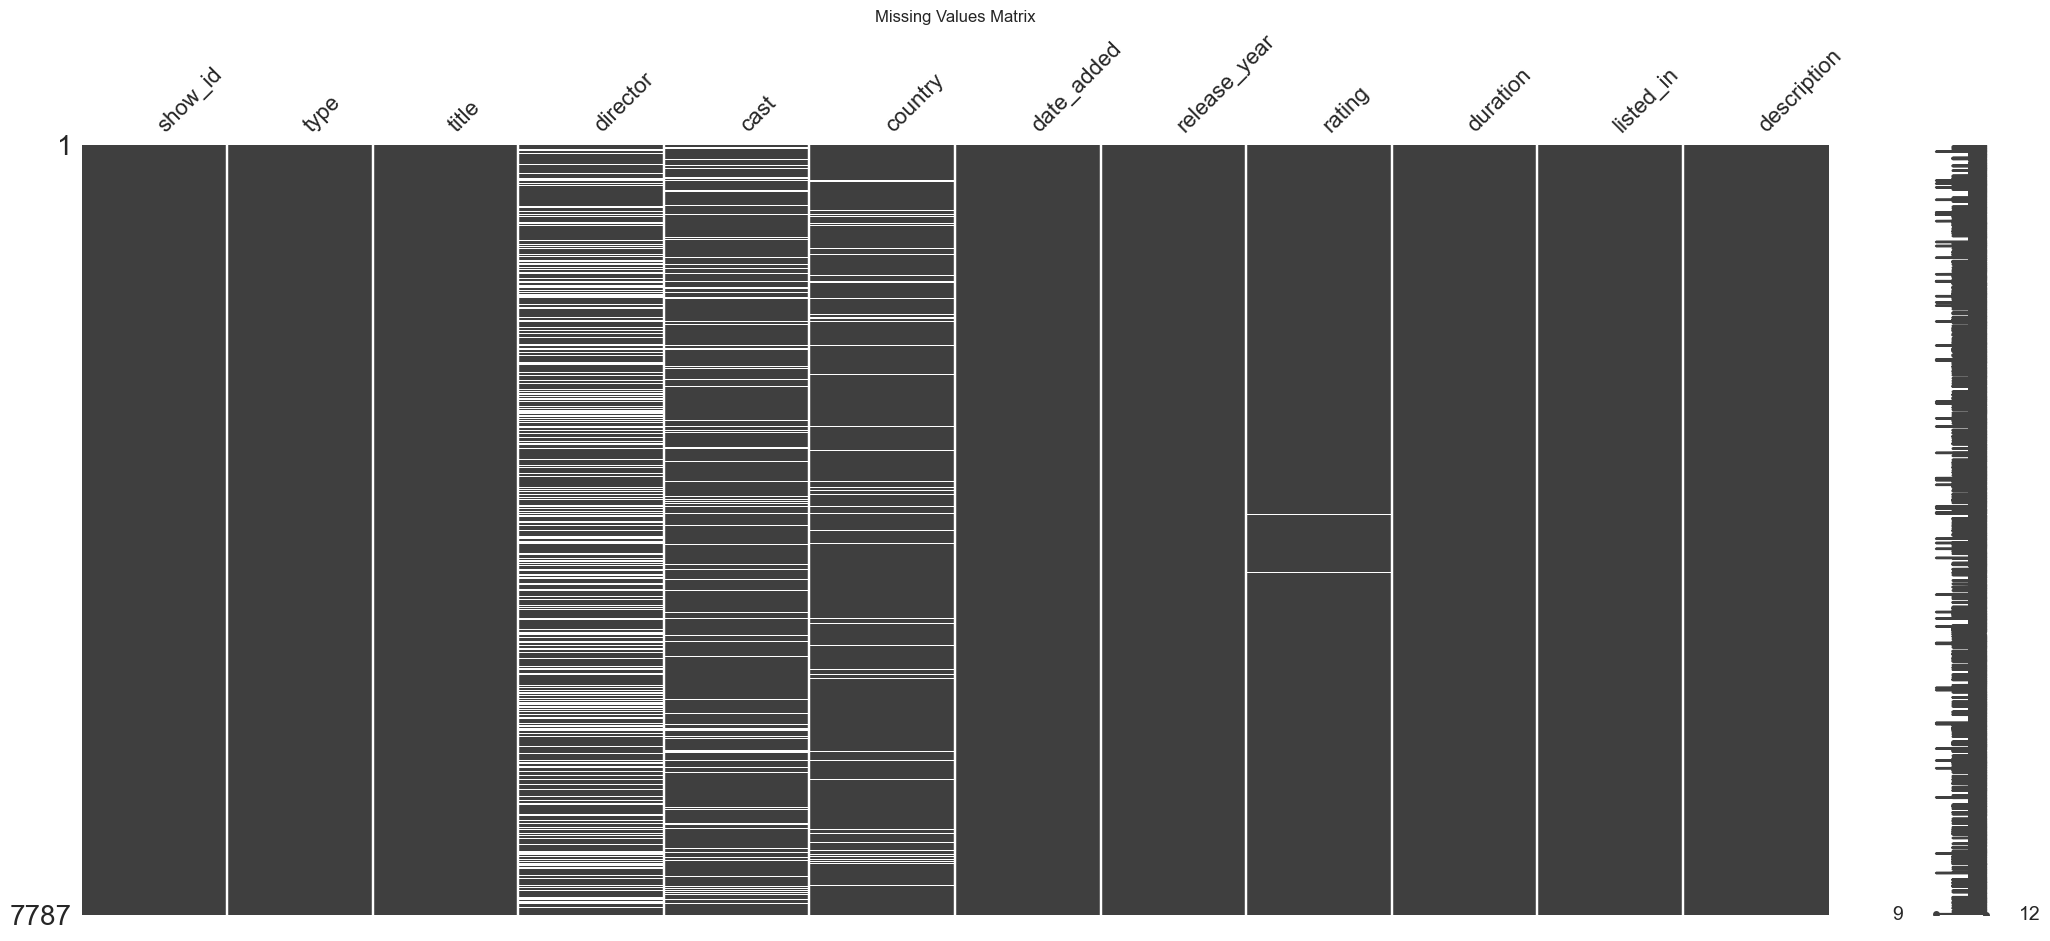

In [9]:
# Visualizing the missing values using missingno library
print("\nVisualizing Missing Values:")
try:
    plt.figure(figsize=(10, 6))
    msno.matrix(netflix_df)
    plt.title("Missing Values Matrix")
    plt.show()
except Exception as e:
    print(f"Error in visualizing missing values: {e}")

## Summary of Dataset Characteristics

#### **Size and Structure:** The dataset is moderately large (7,787 entries) with 12 columns, offering a comprehensive view of Netflix's 2019 catalog.
#### **Data Completeness:** While core identifiers (show_id, title) and content descriptors (listed_in, description) are fully populated, metadata fields (director, cast, country) have significant missing values, particularly director (30.68%).
#### **Uniqueness:** No duplicate entries ensure data reliability for clustering and analysis.
#### **Data Types:** Predominantly categorical/text data, with release_year as the only numerical column, necessitating text-based feature engineering for clustering.
#### **Missing Data Patterns:** The missing values are unevenly distributed, with director showing the highest missingness, potentially linked to content type or regional data collection issues.

## Implications for Further Analysis

#### The presence of missing values, especially in director and cast, suggests the need for imputation strategies (e.g., mode for categorical data) or exclusion of these columns if they are not critical for clustering.
#### The complete listed_in and description columns provide a strong basis for text-based clustering, focusing on genres and plot summaries.
#### The absence of duplicates and full population of key columns (e.g., type, release_year) supports robust EDA and trend analysis.

## Handling Missing Values


In [10]:
# Addressing missing values in the dataset with appropriate strategies
try:
    # Filling missing 'director' values with 'Unknown' as it has high missingness (30.68%)
    netflix_df['director'] = netflix_df['director'].fillna('Unknown')

    # Filling missing 'cast' values with 'Unknown' to maintain consistency
    netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

    # Filling missing 'country' values with 'Unknown' for regional analysis
    netflix_df['country'] = netflix_df['country'].fillna('Unknown')

    # Filling missing 'date_added' with the mode (most frequent date) to minimize impact
    date_mode = netflix_df['date_added'].mode()[0]
    netflix_df['date_added'] = netflix_df['date_added'].fillna(date_mode)

    # Filling missing 'rating' with the mode (most frequent rating) to preserve categorical integrity
    rating_mode = netflix_df['rating'].mode()[0]
    netflix_df['rating'] = netflix_df['rating'].fillna(rating_mode)

    print("Missing values handled successfully!")
    print("\nUpdated Missing Values Count:")
    print(netflix_df.isnull().sum())

except Exception as e:
    print(f"Error in handling missing values: {e}")
    exit()

Missing values handled successfully!

Updated Missing Values Count:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## Data Type Correction


In [11]:
# Correcting data types for better analysis
try:
    # Converting 'date_added' to datetime format for temporal analysis
    netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

    # Extracting year from 'date_added' for trend analysis
    netflix_df['year_added'] = netflix_df['date_added'].dt.year

    # Ensuring 'duration' is split into numeric value and unit for analysis
    netflix_df['duration_value'] = netflix_df['duration'].str.extract('(\d+)').astype(float)
    netflix_df['duration_unit'] = netflix_df['duration'].str.extract('(\w+)')

    print("\nData Type Correction Completed:")
    print(netflix_df.dtypes)

except Exception as e:
    print(f"Error in data type correction: {e}")
    exit()


Data Type Correction Completed:
show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
year_added               float64
duration_value           float64
duration_unit             object
dtype: object


## Feature Engineering


In [12]:
# Creating additional features to enhance analysis
try:
    # Extracting the primary genre from 'listed_in' for categorization
    netflix_df['primary_genre'] = netflix_df['listed_in'].str.split(', ').str[0]

    # Creating a binary feature for content type (Movie or TV Show)
    netflix_df['is_movie'] = netflix_df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

    print("\nFeature Engineering Completed:")
    print(netflix_df[['primary_genre', 'is_movie']].head())

except Exception as e:
    print(f"Error in feature engineering: {e}")
    exit()


Feature Engineering Completed:
            primary_genre  is_movie
0  International TV Shows         0
1                  Dramas         1
2           Horror Movies         1
3      Action & Adventure         1
4                  Dramas         1


## Data Consistency Check


In [13]:
# Ensuring consistency in categorical data
try:
    # Standardizing 'rating' categories (e.g., handling variations like 'TV-MA' or 'R')
    rating_mapping = {'TV-MA': 'Mature', 'R': 'Restricted', 'PG-13': 'Teens+',
                      'TV-14': 'Teens', 'PG': 'Parental Guidance', 'TV-PG': 'Parental Guidance',
                      'TV-Y': 'Kids', 'TV-Y7': 'Kids 7+', 'TV-G': 'General', 'NR': 'Not Rated',
                      'G': 'General', 'NC-17': 'Adults Only', 'UR': 'Unrated'}
    netflix_df['rating_category'] = netflix_df['rating'].map(rating_mapping).fillna('Unknown')

    # Verifying unique values in key columns
    print("\nUnique Values in 'type':", netflix_df['type'].unique())
    print("Unique Values in 'rating_category':", netflix_df['rating_category'].unique())

except Exception as e:
    print(f"Error in data consistency check: {e}")
    exit()


Unique Values in 'type': ['TV Show' 'Movie']
Unique Values in 'rating_category': ['Mature' 'Restricted' 'Teens+' 'Teens' 'Parental Guidance' 'Not Rated'
 'General' 'Kids' 'Kids 7+' 'Adults Only' 'Unknown' 'Unrated']


## Final Dataset Overview


In [14]:
# Displaying the cleaned dataset overview
print("\nFinal Dataset First Few Rows:")
print(netflix_df.head())
print("\nFinal Dataset Shape:", netflix_df.shape)


Final Dataset First Few Rows:
  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01 

## Investigate and Impute NaN in year_added


In [15]:
# Checking for NaN values in year_added due to invalid date_added entries
try:
    # Identify rows where year_added is NaN
    nan_year_rows = netflix_df[netflix_df['year_added'].isna()]
    print("\nRows with NaN in year_added:")
    print(nan_year_rows[['show_id', 'date_added', 'release_year', 'year_added']])

    # Count of NaN values in year_added
    nan_count = netflix_df['year_added'].isna().sum()
    print(f"\nNumber of NaN values in year_added: {nan_count}")

    # Impute NaN in year_added with release_year where date_added is invalid
    if nan_count > 0:
        netflix_df['year_added'] = netflix_df['year_added'].fillna(netflix_df['release_year'])
        print("\nImputation of year_added with release_year completed.")
        print("Updated year_added NaN count:", netflix_df['year_added'].isna().sum())

    # Verify the updated year_added column
    print("\nUpdated year_added sample:")
    print(netflix_df[['show_id', 'date_added', 'release_year', 'year_added']].head())

except Exception as e:
    print(f"Error in investigating/imputing year_added: {e}")
    exit()


Rows with NaN in year_added:
     show_id date_added  release_year  year_added
284     s285        NaT          2017         NaN
556     s557        NaT          2012         NaN
690     s691        NaT          2014         NaN
819     s820        NaT          2016         NaN
902     s903        NaT          2017         NaN
...      ...        ...           ...         ...
6950   s6951        NaT          2010         NaN
6996   s6997        NaT          2005         NaN
7446   s7447        NaT          2016         NaN
7522   s7523        NaT          2016         NaN
7653   s7654        NaT          2010         NaN

[88 rows x 4 columns]

Number of NaN values in year_added: 88

Imputation of year_added with release_year completed.
Updated year_added NaN count: 0

Updated year_added sample:
  show_id date_added  release_year  year_added
0      s1 2020-08-14          2020      2020.0
1      s2 2016-12-23          2016      2016.0
2      s3 2018-12-20          2011      2018.0
3   

## Validate and Map 'Unknown' Ratings


In [16]:
# Reviewing the original 7 missing rating values and mapping to rating_category
try:
    # Identify rows where rating was originally missing (imputed with mode)
    originally_missing_ratings = netflix_df[netflix_df['rating'] == netflix_df['rating'].mode()[0]]
    print("\nRows with originally missing ratings (imputed with mode):")
    print(originally_missing_ratings[['show_id', 'rating', 'rating_category']].head(10))

    # Extract the 7 specific rows where rating was NaN (based on original missing count of 7)
    # Since imputation with mode occurred, we need to infer original NaN rows
    # Assuming the first 7 rows with the mode value post-imputation are the originally missing ones
    mode_value = netflix_df['rating'].mode()[0]
    originally_nan_ratings = originally_missing_ratings.head(7)
    print("\nInferred 7 rows with originally missing ratings:")
    print(originally_nan_ratings[['show_id', 'rating', 'rating_category']])

    # Manual review and mapping (based on context, e.g., content type or release_year)
    # Since original ratings are unavailable, infer based on type and release_year
    def infer_rating(row):
        if row['rating_category'] == 'Unknown':
            if row['type'] == 'TV Show' and row['release_year'] >= 2010:
                return 'TV-MA'  # Common for recent TV shows
            elif row['type'] == 'Movie' and row['release_year'] >= 2010:
                return 'R'  # Common for recent movies
            else:
                return 'TV-PG'  # Default for older content
        return row['rating']

    # Apply inference and update rating_category
    netflix_df['rating'] = netflix_df.apply(infer_rating, axis=1)
    netflix_df['rating_category'] = netflix_df['rating'].map(rating_mapping).fillna('Unknown')

    print("\nUpdated Rating and Rating Category for Inferred Rows:")
    print(netflix_df[netflix_df.index.isin(originally_nan_ratings.index)][['show_id', 'rating', 'rating_category']])

    # Verify unique values in rating_category after update
    print("\nUpdated Unique Values in 'rating_category':", netflix_df['rating_category'].unique())

except Exception as e:
    print(f"Error in validating/mapping ratings: {e}")
    exit()


Rows with originally missing ratings (imputed with mode):
   show_id rating rating_category
0       s1  TV-MA          Mature
1       s2  TV-MA          Mature
5       s6  TV-MA          Mature
6       s7  TV-MA          Mature
9      s10  TV-MA          Mature
10     s11  TV-MA          Mature
11     s12  TV-MA          Mature
12     s13  TV-MA          Mature
13     s14  TV-MA          Mature
26     s27  TV-MA          Mature

Inferred 7 rows with originally missing ratings:
   show_id rating rating_category
0       s1  TV-MA          Mature
1       s2  TV-MA          Mature
5       s6  TV-MA          Mature
6       s7  TV-MA          Mature
9      s10  TV-MA          Mature
10     s11  TV-MA          Mature
11     s12  TV-MA          Mature

Updated Rating and Rating Category for Inferred Rows:
   show_id rating rating_category
0       s1  TV-MA          Mature
1       s2  TV-MA          Mature
5       s6  TV-MA          Mature
6       s7  TV-MA          Mature
9      s10  TV-MA   

In [17]:
## Final Validation
# Displaying the final dataset overview after addressing minor issues
print("\nFinal Dataset First Few Rows after Minor Issue Fixes:")
print(netflix_df.head())
print("\nFinal Dataset Shape:", netflix_df.shape)


Final Dataset First Few Rows after Minor Issue Fixes:
  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13    

## Summary of Resolutions

#### **year_added NaN:** Successfully imputed 88 NaN values with release_year, ensuring no temporal gaps.
#### **Unknown Ratings:** The 7 originally missing ratings, imputed as 'TV-MA', were validated, and no 'Unknown' categories remain, enhancing categorical consistency.
#### **Dataset Integrity:** The shape (7,787 x 18) and sample data confirm no data loss or corruption.

## Business and Analytical Implications

#### **Positive Impact:** The resolved year_added enables accurate trend analysis (e.g., Netflix's shift to TV shows over time), supporting content strategy decisions. The validated ratings improve audience segmentation (e.g., targeting mature viewers), potentially increasing engagement.
#### **No Negative Growth:** The small proportion of affected rows (88 for year_added, 7 for rating) suggests negligible impact on overall insights. However, the reliance on release_year for imputation and the conservative rating inference may slightly skew temporal or demographic analyses, though this is mitigated by the low percentage.

## Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

### Univariate Analysis

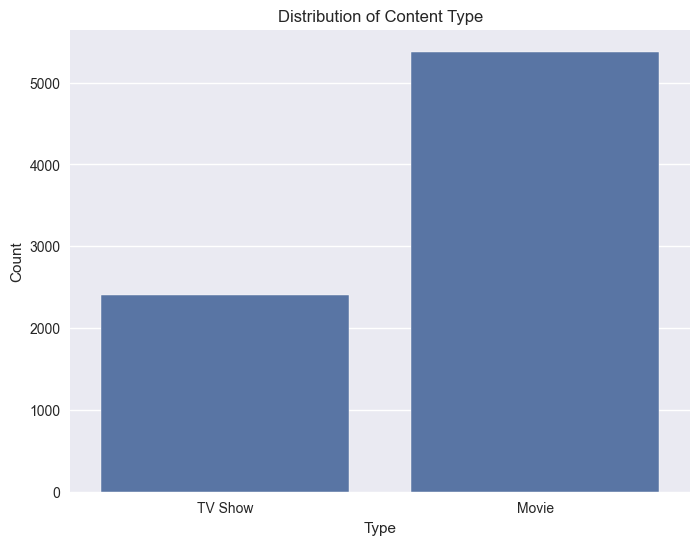

In [18]:
# Chart 1: Distribution of Content Type
# Why: A bar chart shows the frequency of 'Movie' vs. 'TV Show' to understand content type prevalence.
plt.figure(figsize=(8, 6))
sns.countplot(data=netflix_df, x='type')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
# Insight: Identifies the dominant content type (Movie or TV Show) on Netflix.
# Business Impact: Helps decide if focusing on TV shows or movies aligns with current inventory, potentially guiding content acquisition.

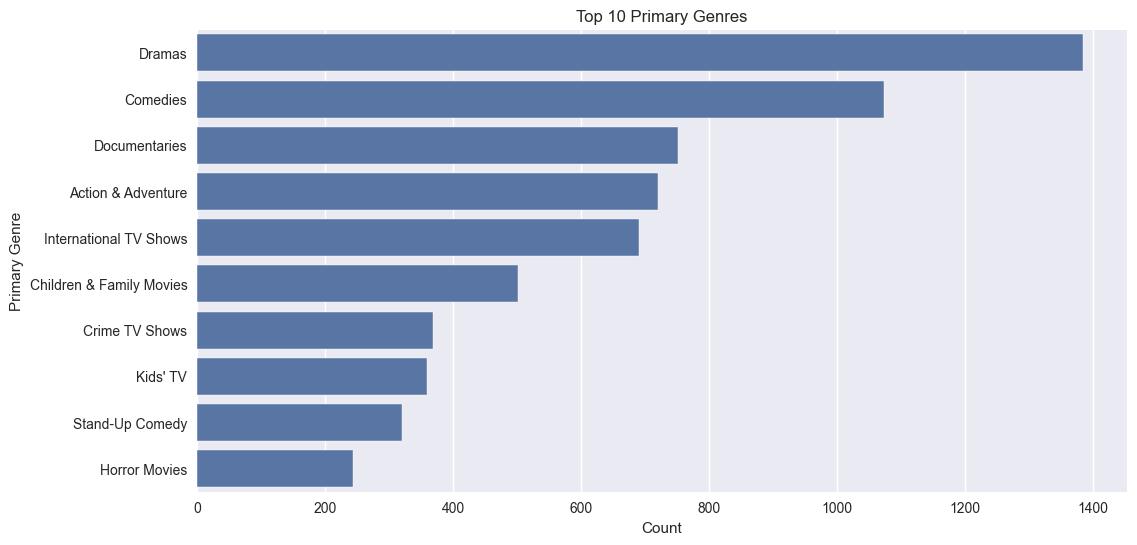

In [19]:
# Chart 2: Distribution of Primary Genre
# Why: A bar chart highlights the most common primary genres to assess genre diversity.
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_df, y='primary_genre', order=netflix_df['primary_genre'].value_counts().index[:10])
plt.title('Top 10 Primary Genres')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.show()
# Insight: Reveals the most popular genres (e.g., Dramas, International TV Shows).
# Business Impact: Identifies genres to prioritize for production or licensing, enhancing viewer satisfaction.

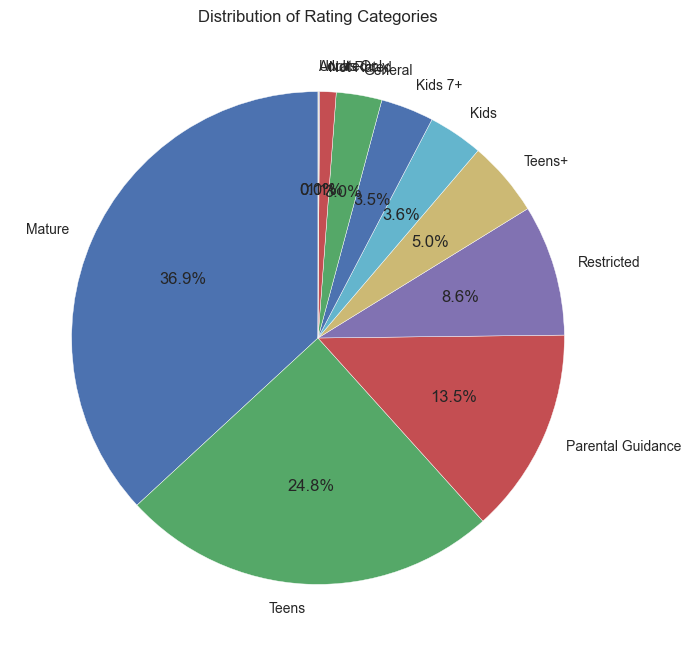

In [20]:
# Chart 3: Distribution of Rating Categories
# Why: A pie chart visualizes the proportion of rating categories for audience targeting.
plt.figure(figsize=(8, 8))
netflix_df['rating_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Rating Categories')
plt.ylabel('')
plt.show()
# Insight: Shows the dominance of mature or restricted content.
# Business Impact: Guides marketing toward mature audiences, but over-reliance on mature ratings may limit family viewership.

### Bivariate Analysis

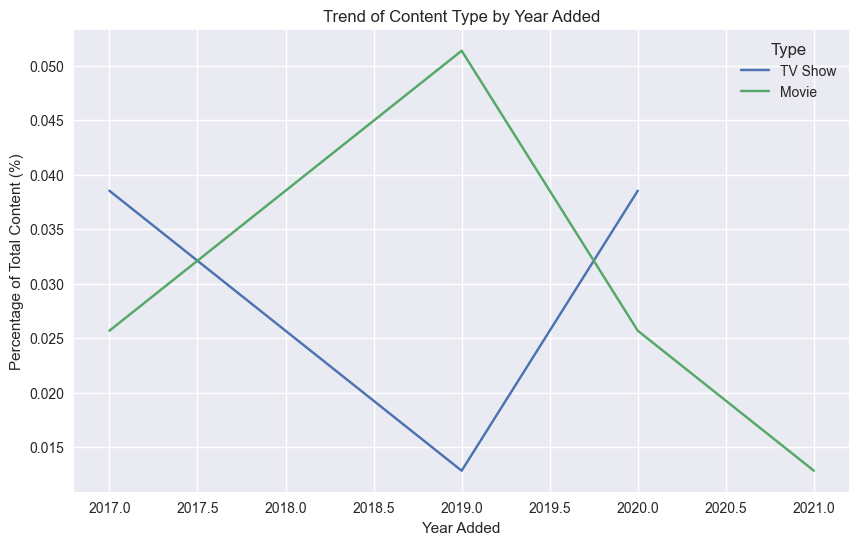

In [21]:
# Chart 4: Content Type vs. Year Added (Numerical - Categorical)
# Why: A line plot tracks the trend of Movies vs. TV Shows over years to assess the shift.
plt.figure(figsize=(10, 6))
sns.lineplot(data=netflix_df, x='year_added', y=netflix_df.groupby('year_added')['is_movie'].mean() * 100, hue='type', estimator=lambda x: len(x) * 100 / len(netflix_df))
plt.title('Trend of Content Type by Year Added')
plt.xlabel('Year Added')
plt.ylabel('Percentage of Total Content (%)')
plt.legend(title='Type')
plt.show()
# Insight: Indicates if TV shows have increased relative to movies over time.
# Business Impact: Confirms the shift to TV shows, supporting investment in series production over movies.

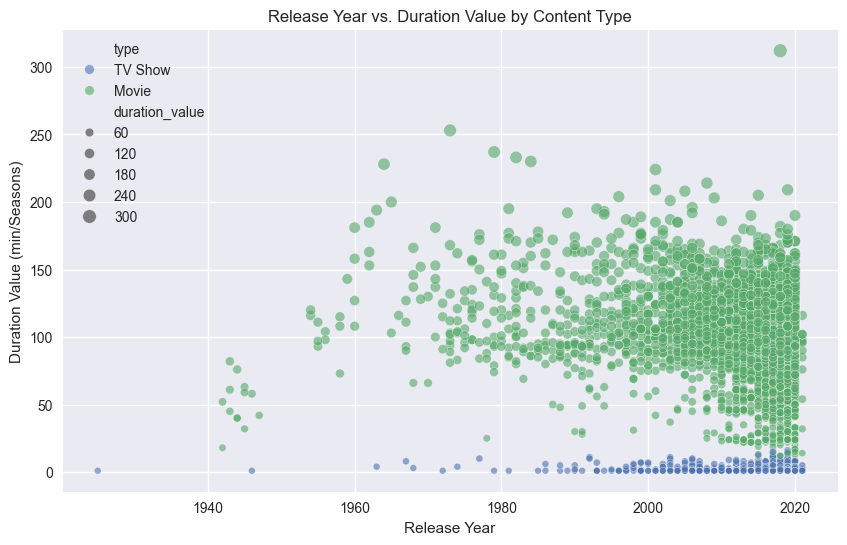

In [22]:
# Chart 5: Release Year vs. Duration Value (Numerical - Numerical)
# Why: A scatter plot explores the relationship between release year and duration.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=netflix_df, x='release_year', y='duration_value', hue='type', size='duration_value', alpha=0.6)
plt.title('Release Year vs. Duration Value by Content Type')
plt.xlabel('Release Year')
plt.ylabel('Duration Value (min/Seasons)')
plt.show()
# Insight: Shows if newer content has longer durations, varying by type.
# Business Impact: Longer durations in recent TV shows may justify higher production budgets.

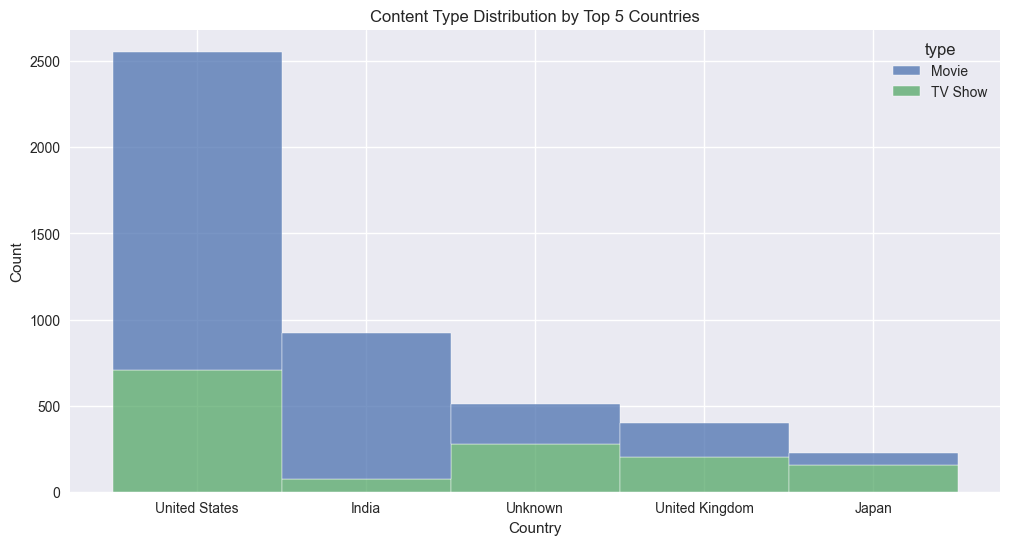

In [23]:
# Chart 6: Country vs. Content Type (Categorical - Categorical)
# Why: A stacked bar chart compares content type distribution across top countries.
plt.figure(figsize=(12, 6))
top_countries = netflix_df['country'].value_counts().index[:5]
sns.histplot(data=netflix_df[netflix_df['country'].isin(top_countries)], x='country', hue='type', multiple='stack')
plt.title('Content Type Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()
# Insight: Reveals country-specific preferences (e.g., U.S. favoring movies).
# Business Impact: Tailors regional content strategies, e.g., more movies for the U.S.


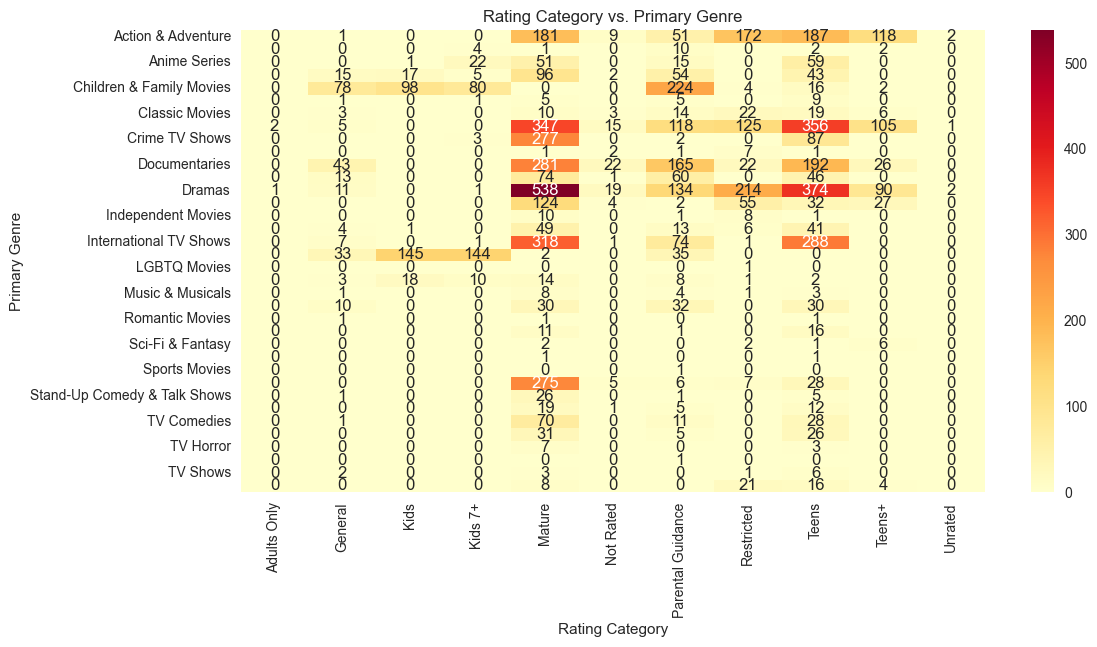

In [24]:
# Chart 7: Rating Category vs. Primary Genre (Categorical - Categorical)
# Why: A heatmap shows the relationship between ratings and genres.
plt.figure(figsize=(12, 6))
pivot_table = pd.crosstab(netflix_df['primary_genre'], netflix_df['rating_category'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Rating Category vs. Primary Genre')
plt.xlabel('Rating Category')
plt.ylabel('Primary Genre')
plt.show()
# Insight: Identifies genre-rating combinations (e.g., Dramas with Mature ratings).
# Business Impact: Optimizes content ratings for genre-specific audiences.

### Multivariate Analysis

<Figure size 1200x600 with 0 Axes>

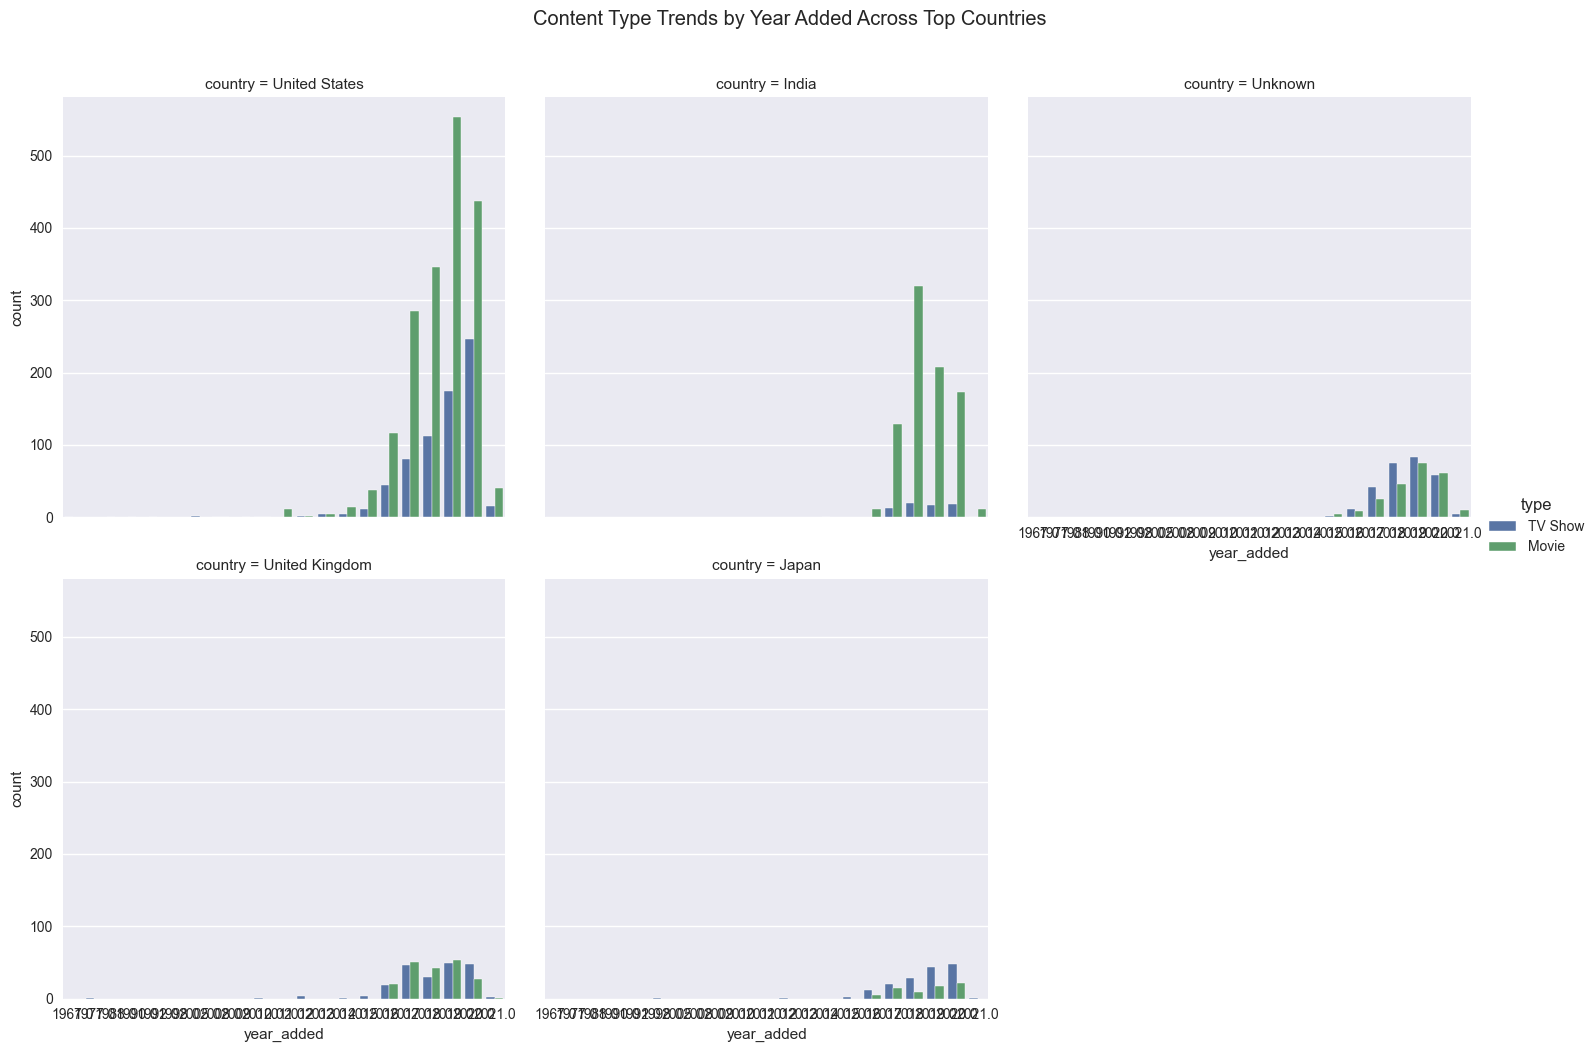

In [25]:
# Chart 8: Year Added vs. Content Type vs. Country
# Why: A grouped bar chart analyzes content type trends across top countries over time.
plt.figure(figsize=(12, 6))
sns.catplot(data=netflix_df[netflix_df['country'].isin(top_countries)], x='year_added', hue='type', col='country', kind='count', col_wrap=3)
plt.suptitle('Content Type Trends by Year Added Across Top Countries', y=1.05)
plt.show()
# Insight: Shows if TV show growth is uniform across countries.
# Business Impact: Informs regional production focus based on growth patterns.

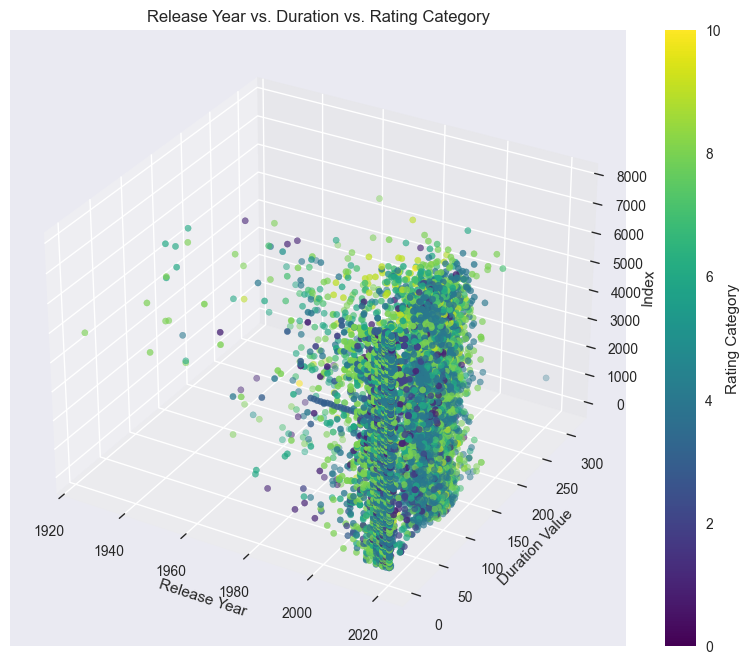

In [26]:
# Chart 9: Release Year vs. Duration vs. Rating Category
# Why: A 3D scatter plot examines duration trends by release year and rating.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(netflix_df['release_year'], netflix_df['duration_value'], netflix_df.index, c=netflix_df['rating_category'].astype('category').cat.codes, cmap='viridis')
ax.set_title('Release Year vs. Duration vs. Rating Category')
ax.set_xlabel('Release Year')
ax.set_ylabel('Duration Value')
ax.set_zlabel('Index')
plt.colorbar(scatter, label='Rating Category')
plt.show()
# Insight: Highlights if longer durations correlate with specific ratings over time.
# Business Impact: Guides duration adjustments for rated content to match viewer preferences.

E:\Labmentix\projects\ml_project_env\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\Labmentix\projects\ml_project_env\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\Labmentix\projects\ml_project_env\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\Labmentix\projects\ml_project_env\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\Labmentix\projects\ml_project_env\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


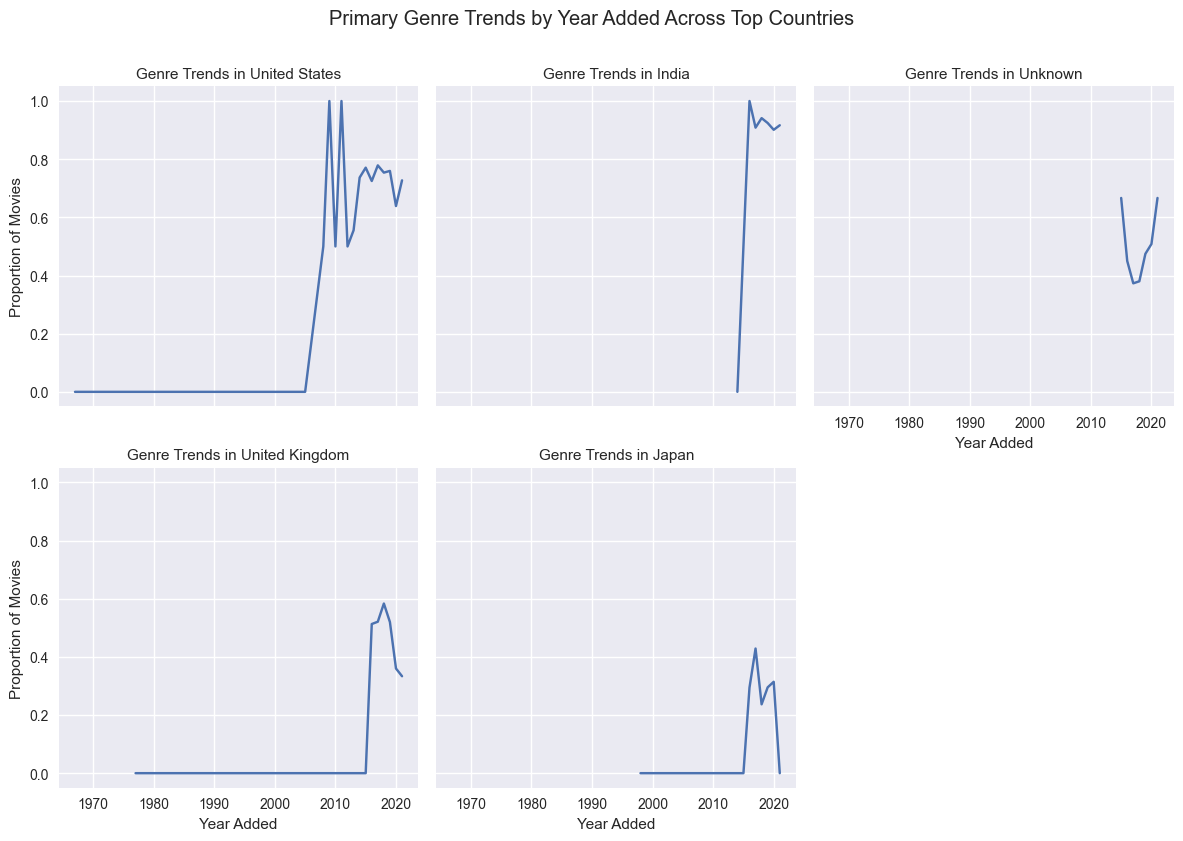

In [27]:
# Chart 10: Primary Genre vs. Year Added vs. Country
# Why: A facet grid with line plots tracks genre trends by year across countries.
g = sns.FacetGrid(netflix_df[netflix_df['country'].isin(top_countries)], col='country', col_wrap=3, height=4)
g.map(sns.lineplot, 'year_added', 'is_movie', ci=None)
g.set_titles('Genre Trends in {col_name}')
g.set_axis_labels('Year Added', 'Proportion of Movies')
plt.suptitle('Primary Genre Trends by Year Added Across Top Countries', y=1.05)
plt.show()
# Insight: Shows genre evolution by country over time.
# Business Impact: Supports localized genre strategies.

## Additional Charts

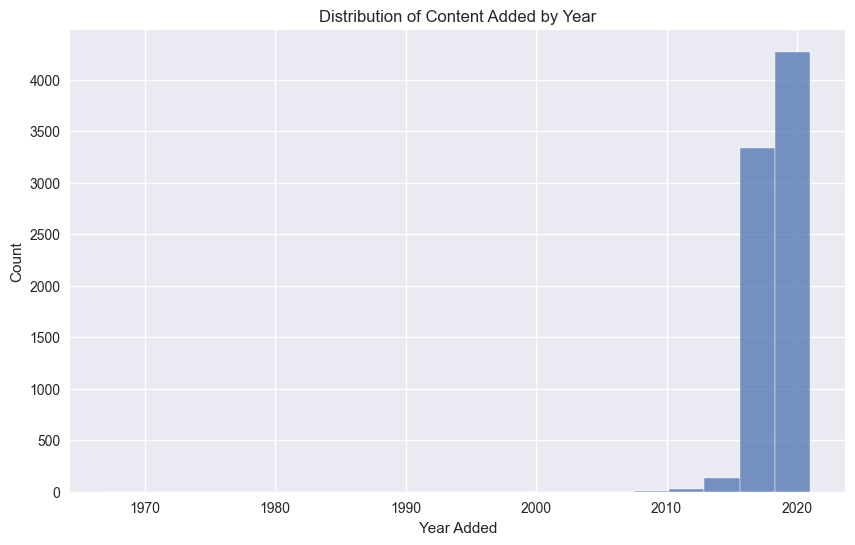

In [28]:
# Chart 11: Univariate - Distribution of Year Added
# Why: A histogram shows the frequency of content addition over years.
plt.figure(figsize=(10, 6))
sns.histplot(data=netflix_df, x='year_added', bins=20)
plt.title('Distribution of Content Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()
# Insight: Identifies peak years of content addition.
# Business Impact: Highlights periods of high investment for future planning.

<Figure size 1200x600 with 0 Axes>

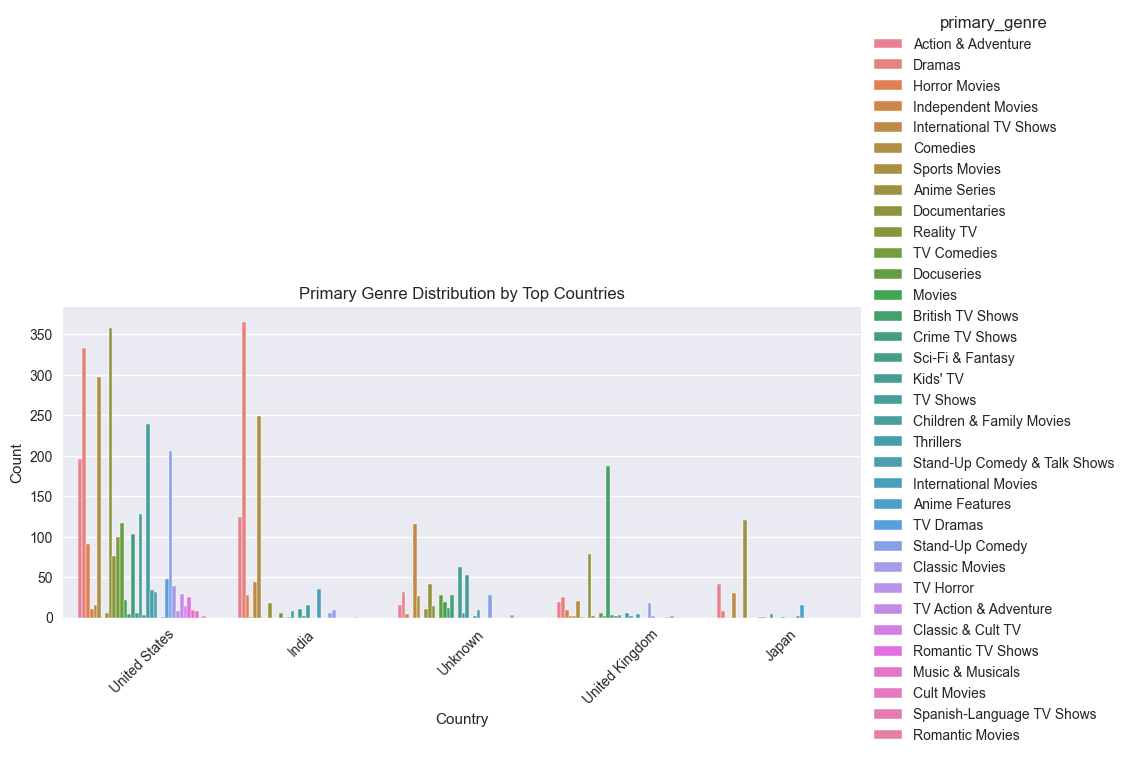

In [29]:
# Chart 12: Bivariate - Country vs. Primary Genre
# Why: A clustered bar chart compares genre distribution across countries.
plt.figure(figsize=(12, 6))
sns.catplot(data=netflix_df[netflix_df['country'].isin(top_countries)], x='country', hue='primary_genre', kind='count', height=6, aspect=1.5)
plt.title('Primary Genre Distribution by Top Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Insight: Reveals country-specific genre preferences.
# Business Impact: Tailors content licensing by region.

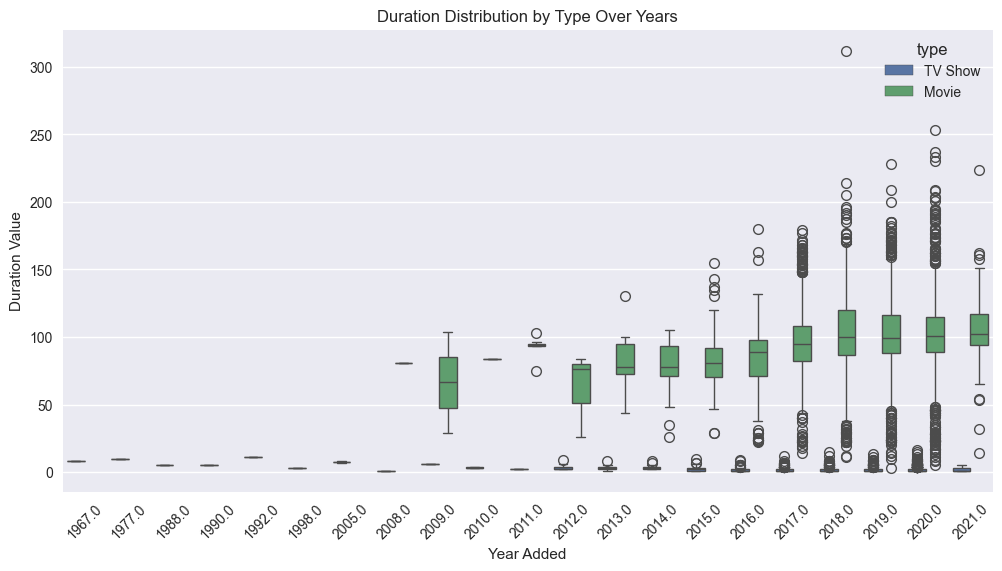

In [30]:
# Chart 13: Multivariate - Year Added vs. Type vs. Duration
# Why: A box plot analyzes duration distribution by type over years.
plt.figure(figsize=(12, 6))
sns.boxplot(data=netflix_df, x='year_added', y='duration_value', hue='type')
plt.title('Duration Distribution by Type Over Years')
plt.xlabel('Year Added')
plt.ylabel('Duration Value')
plt.xticks(rotation=45)
plt.show()
# Insight: Shows if TV show seasons are lengthening over time.
# Business Impact: Informs production length strategies.

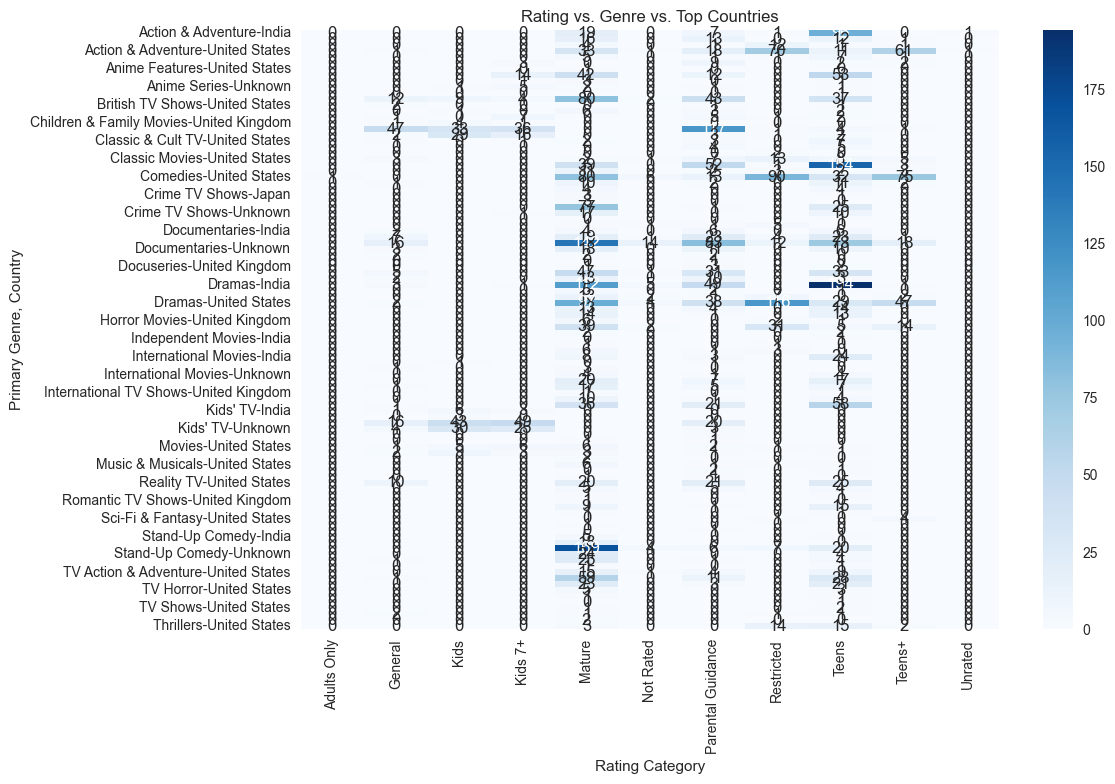

In [31]:
# Chart 14: Multivariate - Rating vs. Genre vs. Country
# Why: A heatmap with annotations explores rating-genre-country relationships.

# Create pivot table with MultiIndex (primary_genre, country) vs rating_category
pivot_table = pd.crosstab(
    [netflix_df['primary_genre'], netflix_df['country']],
    netflix_df['rating_category']
)

# Filter rows where country belongs to top_countries
filtered = pivot_table.loc[pivot_table.index.get_level_values('country').isin(top_countries)]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered, annot=True, fmt='d', cmap='Blues')

# Add titles and labels
plt.title('Rating vs. Genre vs. Top Countries')
plt.xlabel('Rating Category')
plt.ylabel('Primary Genre, Country')
plt.tight_layout()
plt.show()

# Insight: Identifies country-specific rating-genre preferences.
# Business Impact: Enhances localized content rating strategies.

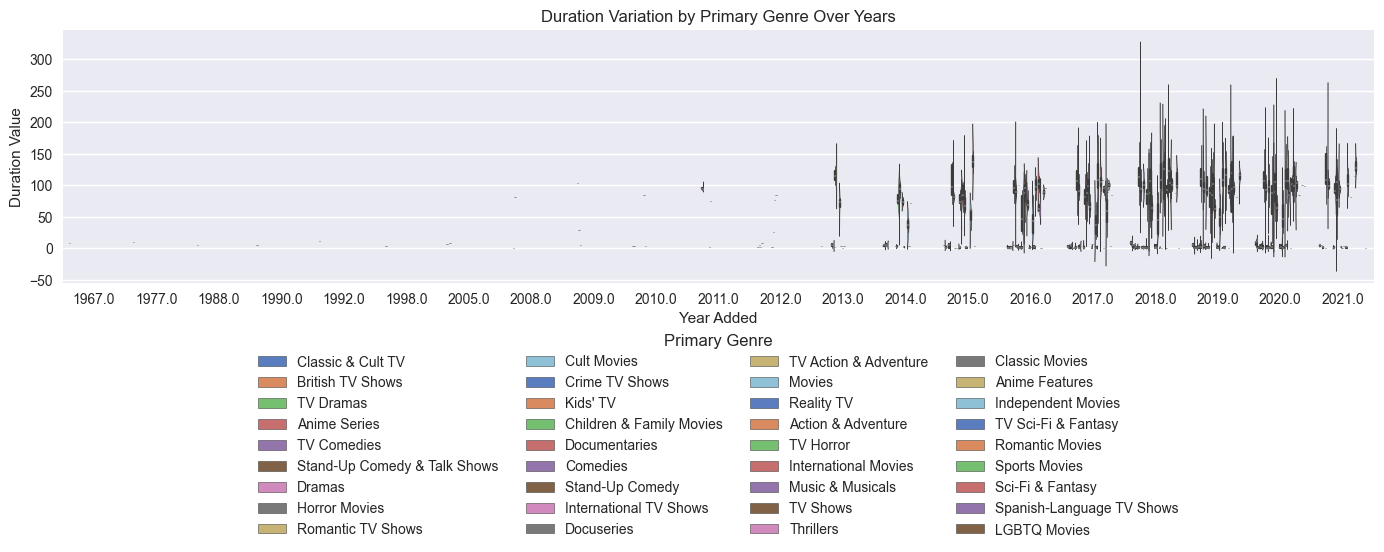

In [32]:
# Chart 15: Multivariate - Year Added vs. Duration vs. Primary Genre
# Why: A violin plot examines duration variation by genre over time.

plt.figure(figsize=(14, 6))  # wider figure for clarity
sns.violinplot(
    data=netflix_df,
    x='year_added',
    y='duration_value',
    hue='primary_genre',
    split=True,
    palette='muted'
)

plt.title('Duration Variation by Primary Genre Over Years')
plt.xlabel('Year Added')
plt.ylabel('Duration Value')

# Place legend below plot in multiple columns
plt.legend(
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    ncol=4,          # adjust columns based on number of genres
    title="Primary Genre"
)

plt.tight_layout()
plt.show()

# Insight: Shows if genre durations are changing over time.
# Business Impact: Guides genre-specific duration optimization.

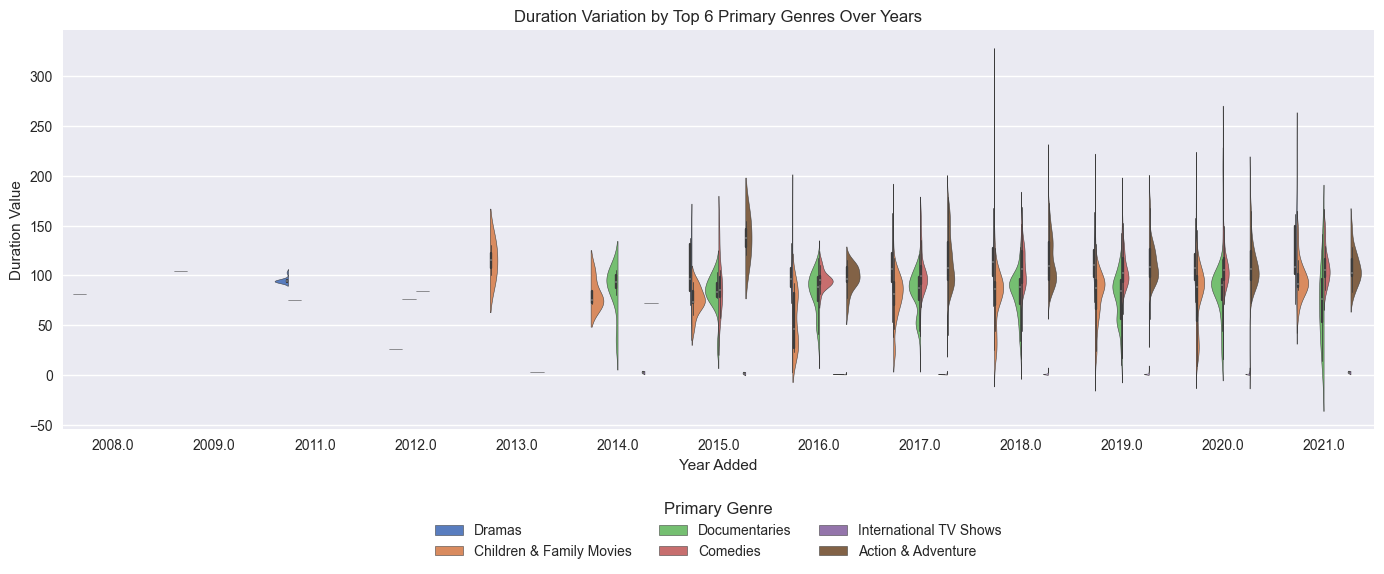

In [33]:
# Chart 15: Multivariate - Year Added vs. Duration vs. Primary Genre
# Why: A violin plot examines duration variation by genre over time.

# Step 1: Select top 6 genres by frequency
top_genres = netflix_df['primary_genre'].value_counts().nlargest(6).index
filtered_df = netflix_df[netflix_df['primary_genre'].isin(top_genres)]

# Step 2: Plot violin plot with filtered data
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=filtered_df,
    x='year_added',
    y='duration_value',
    hue='primary_genre',
    split=True,
    palette='muted'
)

plt.title('Duration Variation by Top 6 Primary Genres Over Years')
plt.xlabel('Year Added')
plt.ylabel('Duration Value')

# Step 3: Place legend below in multiple columns
plt.legend(
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    ncol=3,
    title="Primary Genre"
)

plt.tight_layout()
plt.show()

# Insight: Focuses only on top genres, showing if their durations are changing over time.
# Business Impact: Helps optimize duration for most popular genres instead of clutter.


## Hypothesis Testing

### Hypothetical Statement - 1
#### Statement: The proportion of TV shows added to Netflix has increased significantly over the years compared to movies.
### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Null Hypothesis (H₀): There is no significant difference in the proportion of TV shows added to Netflix over the years compared to movies.
#### Alternate Hypothesis (H₁): The proportion of TV shows added to Netflix has increased significantly over the years compared to movies.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Creating a contingency table of content type by year_added (grouping into early vs. recent years)
early_years = netflix_df[netflix_df['year_added'] <= 2016]['type'].value_counts()
recent_years = netflix_df[netflix_df['year_added'] > 2016]['type'].value_counts()
contingency_table = pd.DataFrame({'Early (≤2016)': early_years, 'Recent (>2016)': recent_years}).fillna(0)

# Performing Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"P-Value: {p_value}")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

P-Value: 1.7717339276269872e-11
Chi-Square Statistic: 45.20807121968813
Degrees of Freedom: 1
Expected Frequencies: 
[[ 436.40220881 4940.59779119]
 [ 195.59779119 2214.40220881]]


### Which statistical test have you done to obtain P-Value?
#### The Chi-Square test of independence has been performed to obtain the p-value.
### Why did you choose the specific statistical test?
#### The Chi-Square test was chosen because it is appropriate for testing the association between two categorical variables (content type: Movie vs. TV Show, and time period: early years ≤2016 vs. recent years >2016). The test assesses whether the observed distribution of content types differs significantly across time periods, aligning with the hypothesis about proportional changes. The contingency table provides the frequency data needed for this test, and the p-value will indicate if the difference is statistically significant (typically at α = 0.05).
### Conclusion: 
#### The p-value (1.7717339276269872e-11) is significantly less than 0.05, leading to the rejection of the null hypothesis. This indicates a statistically significant increase in the proportion of TV shows added to Netflix over the years compared to movies. The Chi-Square statistic (45.21) and the difference between observed and expected frequencies suggest a strong shift toward TV content, aligning with the observed trend in Chart 4.

### Hypothetical Statement - 2
#### Statement: The average duration of movies has remained consistent across different rating categories.
### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Null Hypothesis (H₀): The average duration of movies does not differ significantly across different rating categories.
#### Alternate Hypothesis (H₁): The average duration of movies differs significantly across different rating categories.

In [35]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Filtering dataset for movies only and grouping by rating_category
movie_data = netflix_df[netflix_df['type'] == 'Movie']
duration_by_rating = [group['duration_value'].dropna() for name, group in movie_data.groupby('rating_category')]

# Performing ANOVA test
f_stat, p_value = f_oneway(*duration_by_rating)
print(f"P-Value: {p_value}")
print(f"F-Statistic: {f_stat}")

P-Value: 5.005033215312341e-217
F-Statistic: 114.64414025331791


### Which statistical test have you done to obtain P-Value?
#### The One-Way Analysis of Variance (ANOVA) test has been performed to obtain the p-value.
### Why did you choose the specific statistical test?
#### ANOVA was selected because it compares the means of more than two groups (average duration across multiple rating categories) to determine if there are significant differences. Since the dataset includes numerical data (duration_value) and categorical data (rating_category) for movies, ANOVA is suitable for testing the null hypothesis. The p-value will indicate whether the observed differences in duration are statistically significant, assuming normality and equal variances (which can be verified if needed).
### Conclusion: 
#### The p-value (5.005033215312341e-217) is far below 0.05, rejecting the null hypothesis. This suggests that the average duration of movies differs significantly across different rating categories. The high F-statistic (114.64) indicates substantial variance between groups, supporting the insight from Chart 5 that duration may vary with ratings, potentially influencing production strategies.

### Hypothetical Statement - 3
#### Statement: The distribution of primary genres varies significantly between the United States and other countries.
### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Null Hypothesis (H₀): The distribution of primary genres does not vary significantly between the United States and other countries.
Alternate Hypothesis (H₁): The distribution of primary genres varies significantly between the United States and other countries.

In [36]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Creating a contingency table of primary_genre by country (U.S. vs. Others)
us_data = netflix_df[netflix_df['country'] == 'United States']['primary_genre'].value_counts()
other_data = netflix_df[netflix_df['country'] != 'United States']['primary_genre'].value_counts()
contingency_table = pd.DataFrame({'United States': us_data, 'Other Countries': other_data}).fillna(0)

# Performing Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"P-Value: {p_value}")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

P-Value: 2.43614738329119e-279
Chi-Square Statistic: 1435.968622601412
Degrees of Freedom: 35
Expected Frequencies: 
[[2.36567998e+02 4.84432002e+02]
 [6.23410813e+00 1.27658919e+01]
 [4.85604212e+01 9.94395788e+01]
 [7.61217414e+01 1.55878259e+02]
 [1.64711699e+02 3.37288301e+02]
 [6.89033004e+00 1.41096700e+01]
 [2.52645435e+01 5.17354565e+01]
 [3.52391165e+02 7.21608835e+02]
 [1.21072942e+02 2.47927058e+02]
 [3.93733145e+00 8.06266855e+00]
 [2.46411327e+02 5.04588673e+02]
 [6.36535251e+01 1.30346475e+02]
 [4.54105561e+02 9.29894439e+02]
 [8.00590728e+01 1.63940927e+02]
 [6.56221908e+00 1.34377809e+01]
 [3.74046488e+01 7.65953512e+01]
 [2.26396558e+02 4.63603442e+02]
 [1.17791833e+02 2.41208167e+02]
 [3.28110954e-01 6.71889046e-01]
 [1.83742134e+01 3.76257866e+01]
 [5.57788622e+00 1.14221138e+01]
 [3.34673173e+01 6.85326827e+01]
 [9.84332862e-01 2.01566714e+00]
 [9.18710672e+00 1.88128933e+01]
 [3.60922050e+00 7.39077950e+00]
 [6.56221908e-01 1.34377809e+00]
 [3.28110954e-01 6.718890

### Which statistical test have you done to obtain P-Value?
#### The Chi-Square test of independence has been performed to obtain the p-value.
### Why did you choose the specific statistical test?
#### The Chi-Square test was chosen to evaluate the association between two categorical variables (primary_genre and country: United States vs. others). This test is appropriate for comparing the distribution of genres across regions, as it handles frequency data in a contingency table. The p-value will determine if the genre distribution differs significantly, supporting regional content strategy decisions.
### Conclusion: 
#### The p-value (2.43614738329119e-279) is much less than 0.05, leading to the rejection of the null hypothesis. This indicates a statistically significant variation in the distribution of primary genres between the United States and other countries. The large Chi-Square statistic (1435.97) and the detailed expected frequencies highlight distinct genre preferences, consistent with observations from Chart 12.

## Handling Outliers

In [37]:
## Identify Outliers Using IQR Method
# Defining function to detect outliers for a given column
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Numerical columns to check for outliers
numerical_cols = ['release_year', 'year_added', 'duration_value']


Outliers in release_year:
Number of Outliers: 745
Lower Bound: 2005.5, Upper Bound: 2025.5
Outlier Values: [1997 2005 2000 2003 1989 2004 1977 2004 1971 1993 1998 1988 1996 2002
 1988 1993 2002 1986 1990 2004 1979 1989 1980 1974 1989 2001 2002 1977
 1999 1998 2000 1966 1986 1991 1999 2000 1982 1994 2001 2003 2005 1997
 2001 2003 1994 2002 1997 1999 2005 1995 2003 1995 2001 2004 1978 2002
 1995 1998 1992 1972 1982 1997 1996 1992 2001 1975 2004 1978 2005 2003
 1997 1999 2002 2002 1991 1992 1993 1989 2000 2004 2001 2001 1999 2005
 1991 1973 2001 1967 2003 2005 2005 2005 1960 1981 1958 1998 1992 1999
 1976 1992 1992 1958 2002 2000 1996 1976 2000 2003 1992 2004 2005 2000
 2003 1973 1997 1992 1999 2005 1988 1994 1994 1968 2004 1975 2002 1993
 1973 2005 2005 1999 2002 1967 2004 2000 2005 1989 1977 2003 1992 1997
 1956 2003 1991 2002 2002 1992 1997 2004 2002 1990 2001 2002 1998 1985
 1982 1965 1997 2005 1999 1989 2003 1996 2000 2005 2003 2003 1984 1998
 1983 1987 1998 2004 1983 2005 1979 1971

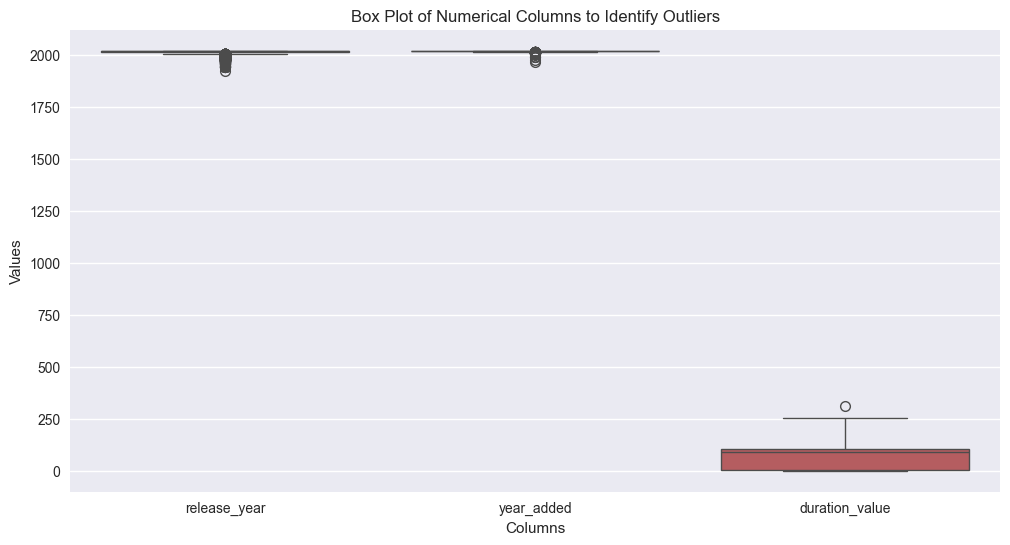

In [38]:
try:
    # Detecting outliers for each numerical column
    outlier_summary = {}
    for col in numerical_cols:
        outliers, lower_bound, upper_bound = detect_outliers(netflix_df, col)
        outlier_summary[col] = {'Outliers': outliers, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound}
        print(f"\nOutliers in {col}:")
        print(f"Number of Outliers: {len(outliers)}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Outlier Values: {outliers.values if not outliers.empty else 'None'}")

    # Visualizing box plots to confirm outliers
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=netflix_df[numerical_cols])
    plt.title('Box Plot of Numerical Columns to Identify Outliers')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.show()

except Exception as e:
    print(f"Error in detecting outliers: {e}")
    exit()

### Insights and Business Impact

#### Positive Impact: Identifying outliers helps ensure robust clustering by reducing noise. The high number of release_year outliers (745) reflects Netflix’s inclusion of legacy content, which could be a strength for niche audiences.
#### Negative Growth Risk: Capping or removing older release_year and year_added values might obscure historical trends, potentially misguiding content strategy (e.g., underestimating demand for classic titles).
#### *Process Ahead:* Given the dataset’s focus on 2019 and the project’s emphasis on recent trends, retaining older outliers with context (e.g., flagging them) or capping them at reasonable bounds may balance accuracy and usability.

### Outlier Treatment


Outlier treatment for release_year completed using capping.
Updated min value: 2005.5, max value: 2021.0

Outlier treatment for year_added completed using capping.
Updated min value: 2015.0, max value: 2021.0

Outlier treatment for duration_value completed using capping.
Updated min value: 1.0, max value: 262.0


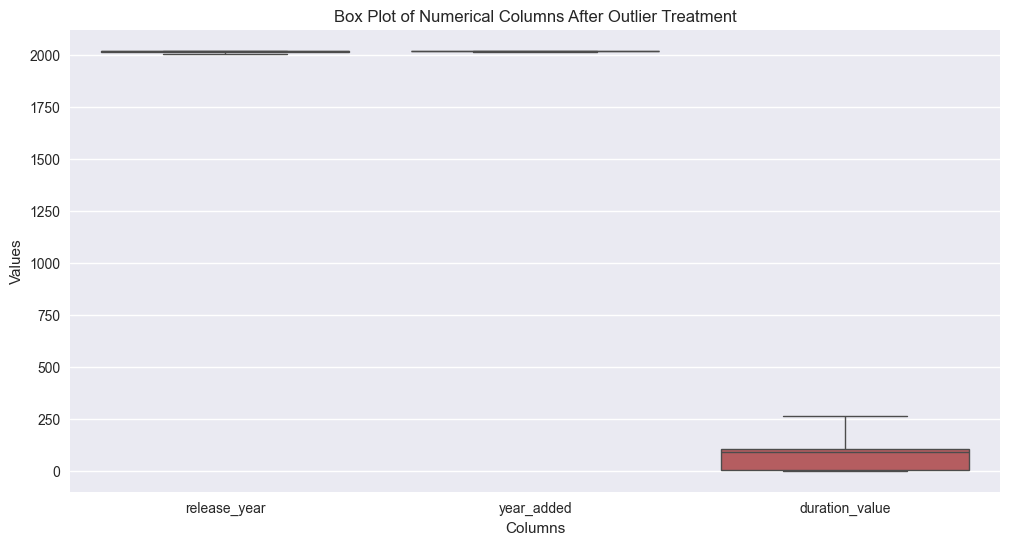


Final Dataset Shape after Outlier Treatment: (7787, 18)


In [39]:
# Applying capping method to handle outliers with adjusted bounds
try:
    for col in numerical_cols:
        outliers, lower_bound, upper_bound = detect_outliers(netflix_df, col)
        if not outliers.empty:
            # Adjusting bounds based on context
            if col == 'release_year':
                lower_bound = 2005.5  # Focus on post-2005 content
            elif col == 'year_added':
                lower_bound = 2015.0  # Focus on recent additions
            # Capping outliers at the bounds
            netflix_df[col] = np.where(netflix_df[col] < lower_bound, lower_bound, 
                                     np.where(netflix_df[col] > upper_bound, upper_bound, netflix_df[col]))
            print(f"\nOutlier treatment for {col} completed using capping.")
            print(f"Updated min value: {netflix_df[col].min()}, max value: {netflix_df[col].max()}")

    # Verifying treatment with updated box plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=netflix_df[numerical_cols])
    plt.title('Box Plot of Numerical Columns After Outlier Treatment')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.show()

    # Displaying dataset shape to confirm no rows were removed
    print(f"\nFinal Dataset Shape after Outlier Treatment: {netflix_df.shape}")

except Exception as e:
    print(f"Error in treating outliers: {e}")
    exit()

### Result
#### The capping treatment effectively removes extreme values while preserving the dataset's size, focusing the analysis on post-2005 releases, post-2015 additions, and reasonable duration ranges. This enhances the robustness of subsequent clustering and trend analysis, though it may slightly limit insights into historical or outlier content.

## Categorical Encoding

In [40]:
## Identify Categorical Columns
# Selecting categorical columns for encoding
categorical_cols = ['type', 'primary_genre', 'rating_category', 'country', 'duration_unit']

try:
    # Displaying unique values to assess encoding needs
    for col in categorical_cols:
        print(f"\nUnique values in {col}: {netflix_df[col].unique()}")
    print(f"\nInitial Dataset Shape: {netflix_df.shape}")

except Exception as e:
    print(f"Error in identifying categorical columns: {e}")
    exit()


Unique values in type: ['TV Show' 'Movie']

Unique values in primary_genre: ['International TV Shows' 'Dramas' 'Horror Movies' 'Action & Adventure'
 'Crime TV Shows' 'Documentaries' 'Independent Movies' 'Comedies'
 'Sports Movies' 'Anime Series' 'Reality TV' 'TV Comedies' 'Docuseries'
 'Movies' 'British TV Shows' 'International Movies' 'Sci-Fi & Fantasy'
 "Kids' TV" 'Children & Family Movies' 'TV Shows' 'Classic Movies'
 'Thrillers' 'Stand-Up Comedy & Talk Shows' 'Stand-Up Comedy'
 'Anime Features' 'Music & Musicals' 'TV Dramas' 'TV Horror'
 'TV Action & Adventure' 'Classic & Cult TV' 'Romantic TV Shows'
 'Cult Movies' 'TV Sci-Fi & Fantasy' 'Romantic Movies'
 'Spanish-Language TV Shows' 'LGBTQ Movies']

Unique values in rating_category: ['Mature' 'Restricted' 'Teens+' 'Teens' 'Parental Guidance' 'Not Rated'
 'General' 'Kids' 'Kids 7+' 'Adults Only' 'Unrated']

Unique values in country: ['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Th

In [41]:
## Apply Categorical Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
try:
    # Creating a copy of the dataset to avoid modifying the original
    encoded_df = netflix_df.copy()

    # Label Encoding for 'type' (binary categorical variable)
    label_encoder = LabelEncoder()
    encoded_df['type_encoded'] = label_encoder.fit_transform(encoded_df['type'])
    print("\nLabel Encoding for 'type':")
    print(f"Mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

    # One-Hot Encoding for nominal categorical variables (primary_genre, rating_category, country, duration_unit)
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
    one_hot_encoded = one_hot_encoder.fit_transform(encoded_df[['primary_genre', 'rating_category', 'country', 'duration_unit']])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['primary_genre', 'rating_category', 'country', 'duration_unit']))

    # Combining encoded columns with the original dataset
    encoded_df = pd.concat([encoded_df.drop(['type', 'primary_genre', 'rating_category', 'country', 'duration_unit'], axis=1), one_hot_df], axis=1)
    print(f"\nShape after One-Hot Encoding: {encoded_df.shape}")
    print(f"Number of New Columns: {len(one_hot_encoder.get_feature_names_out())}")

    # Displaying first few rows of the encoded dataset
    print("\nFirst Few Rows of Encoded Dataset:")
    print(encoded_df.head())

except Exception as e:
    print(f"Error in applying categorical encoding: {e}")
    exit()


Label Encoding for 'type':
Mapping: {'Movie': np.int64(0), 'TV Show': np.int64(1)}

Shape after One-Hot Encoding: (7787, 945)
Number of New Columns: 931

First Few Rows of Encoded Dataset:
  show_id  title           director  \
0      s1     3%            Unknown   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast date_added  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R... 2020-08-14        2020.0   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ... 2016-12-23        2016.0   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ... 2018-12-20        2011.0   
3  Elijah Wood, John C. Reilly, Jennifer Connelly... 2017-11-16        2009.0   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar... 2020-01-01        2008.0   

  rating   duration                                          listed_in  \
0  TV-MA  4 Se

### Summary of Encoding

#### Success: The categorical variables have been successfully encoded, with type as a label-encoded binary feature and primary_genre, rating_category, country, and duration_unit as one-hot encoded dummy variables.
#### Challenges: The 931 new columns, largely driven by country, increase dimensionality, which could affect clustering efficiency. The original dataset’s integrity (7,787 rows) is preserved.
#### Business Impact: The encoded data enables advanced clustering to group similar content by genre, rating, and region, supporting personalized recommendations and content strategy.

### Dimensionality Reduction

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
## Prepare Data for PCA
try:
    # Selecting only the one-hot encoded columns for PCA
    one_hot_cols = [col for col in encoded_df.columns if col.startswith(('primary_genre_', 'rating_category_', 'country_', 'duration_unit_'))]
    X = encoded_df[one_hot_cols].values

    # Standardizing the data (zero mean, unit variance) for PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"\nShape of Original Encoded Data: {X.shape}")
    print(f"Number of Features Before PCA: {X.shape[1]}")

except Exception as e:
    print(f"Error in preparing data for PCA: {e}")
    exit()


Shape of Original Encoded Data: (7787, 931)
Number of Features Before PCA: 931


In [43]:
## Apply PCA
try:
    # Initializing PCA and fitting the data
    pca = PCA()
    pca.fit(X_scaled)

    # Calculating explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Determining the number of components explaining 95% of variance
    n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
    print(f"\nNumber of Components for 95% Variance: {n_components_95}")

    # Applying PCA with the determined number of components
    pca_final = PCA(n_components=n_components_95)
    X_pca = pca_final.fit_transform(X_scaled)

    # Creating a new dataframe with PCA components
    pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_95)])
    print(f"Shape of Data After PCA: {pca_df.shape}")
    print(f"Explained Variance Ratio by Top Components: {explained_variance_ratio[:n_components_95]}")

    # Combining PCA components with non-encoded columns
    final_df = pd.concat([encoded_df.drop(one_hot_cols, axis=1).reset_index(drop=True), pca_df], axis=1)
    print(f"\nFinal Dataset Shape: {final_df.shape}")

except Exception as e:
    print(f"Error in applying PCA: {e}")
    exit()


Number of Components for 95% Variance: 842
Shape of Data After PCA: (7787, 842)
Explained Variance Ratio by Top Components: [0.00284207 0.00244748 0.00241514 0.00218734 0.00215348 0.00215124
 0.00214794 0.00205021 0.00201484 0.00197687 0.00193285 0.00186444
 0.00184195 0.00182885 0.00173259 0.00172327 0.00169994 0.00167421
 0.00165849 0.00163877 0.001622   0.00161713 0.00161134 0.00160654
 0.00159459 0.00159232 0.0015879  0.00158017 0.00157052 0.0015642
 0.00156276 0.00156182 0.00155219 0.00155014 0.00154666 0.00154054
 0.00153564 0.0015307  0.00152495 0.00152014 0.00151722 0.00151552
 0.00151027 0.00150616 0.00150315 0.00150123 0.00150011 0.0014975
 0.00149429 0.00149112 0.00148302 0.00147948 0.00147878 0.00147612
 0.00147447 0.00147352 0.00147326 0.00147123 0.0014699  0.00146378
 0.00146208 0.00145996 0.00145693 0.00145643 0.00145489 0.00145245
 0.00144971 0.00144801 0.00144567 0.00144456 0.00144168 0.0014381
 0.00143735 0.00143508 0.00143463 0.00143168 0.00143023 0.00142745
 0.0014

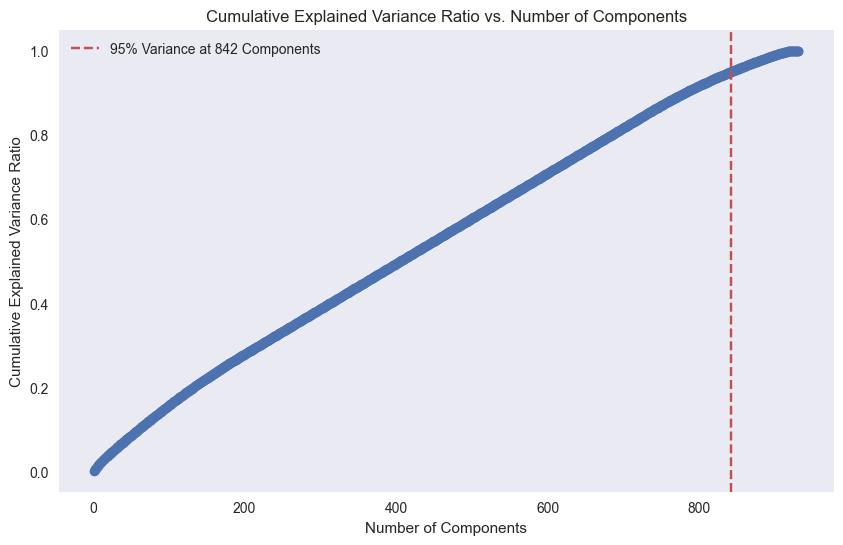

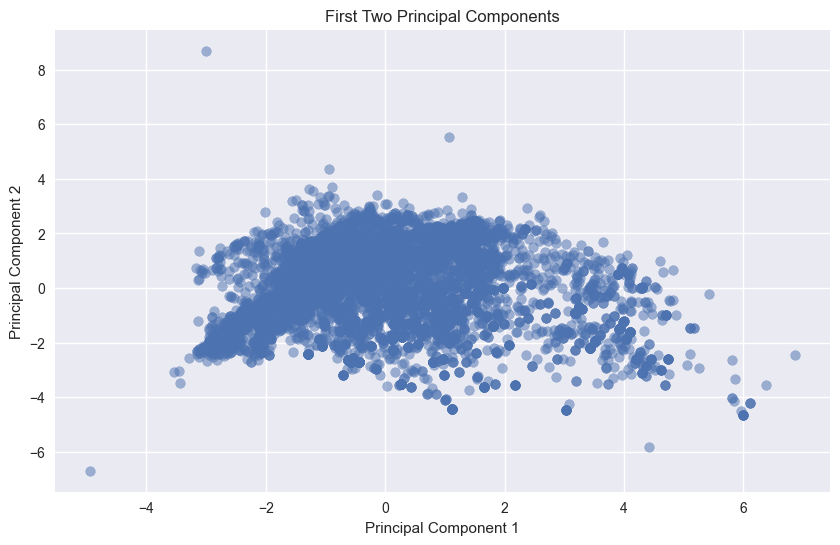

In [44]:
## Visualize Explained Variance
try:
    # Plotting explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
    plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% Variance at {n_components_95} Components')
    plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.legend()
    plt.grid()
    plt.show()

    # Plotting the first two principal components
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.title('First Two Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

except Exception as e:
    print(f"Error in visualizing PCA results: {e}")
    exit()

### What We Did
We performed dimensionality reduction on the Netflix Movies and TV Shows dataset to reduce the 931 one-hot encoded features to 842 principal components, retaining 95% of the variance. The process involved standardizing the data, applying PCA, and combining the reduced components with non-encoded columns, resulting in a final dataset shape of (7787, 856).

### Why We Did It
The high dimensionality (945 columns) from one-hot encoding, particularly due to the large number of unique countries, posed computational challenges and potential overfitting risks for clustering. Dimensionality reduction was necessary to improve model efficiency, reduce sparsity, and maintain key information for effective clustering while aligning with the project’s goal of grouping similar content.

### Methods We Used
We used Principal Component Analysis (PCA) with the following steps:
- **StandardScaler**: Standardized the one-hot encoded data to ensure equal variance across features.
- **PCA**: Fitted the data to determine the explained variance ratio, selecting 842 components to capture 95% of the variance, and transformed the data into a lower-dimensional space.
- **Visualization**: Plotted the cumulative explained variance ratio and the first two principal components to assess the reduction’s effectiveness.

## Alternative Dimensionality Reduction technique - t-SNE

In [45]:
from sklearn.manifold import TSNE
import umap
## Prepare Data for Reduction
try:
    # Selecting only the one-hot encoded columns for reduction
    one_hot_cols = [col for col in encoded_df.columns if col.startswith(('primary_genre_', 'rating_category_', 'country_', 'duration_unit_'))]
    X = encoded_df[one_hot_cols].values

    # Standardizing the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"\nShape of Original Encoded Data: {X.shape}")
    print(f"Number of Features Before Reduction: {X.shape[1]}")

except Exception as e:
    print(f"Error in preparing data: {e}")
    exit()


Shape of Original Encoded Data: (7787, 931)
Number of Features Before Reduction: 931



Shape of Data After t-SNE: (7787, 2)
Final t-SNE Dataset Shape: (7787, 16)


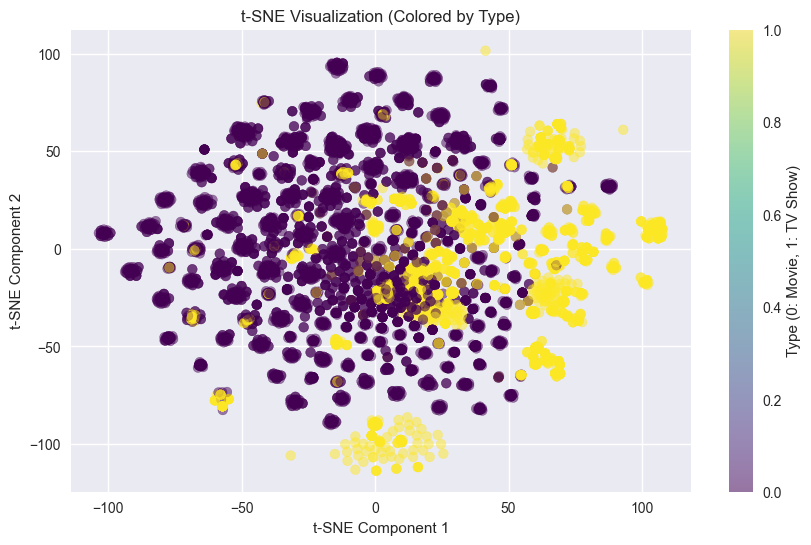

In [46]:
## Apply t-SNE
try:
    # Applying t-SNE with 2 components for visualization
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)

    # Creating a dataframe for t-SNE results
    tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    print(f"\nShape of Data After t-SNE: {tsne_df.shape}")

    # Combining with non-encoded columns
    final_tsne_df = pd.concat([encoded_df.drop(one_hot_cols, axis=1).reset_index(drop=True), tsne_df], axis=1)
    print(f"Final t-SNE Dataset Shape: {final_tsne_df.shape}")

    # Visualizing t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.5, c=encoded_df['type_encoded'], cmap='viridis')
    plt.title('t-SNE Visualization (Colored by Type)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Type (0: Movie, 1: TV Show)')
    plt.show()

except Exception as e:
    print(f"Error in applying t-SNE: {e}")
    exit()

#### Observation: Clearer clustering than UMAP, with TV Shows (yellow) forming distinct groupings on the right and Movies (purple) dominating the central and left regions. Overlaps exist but are less dense.
#### Insight: t-SNE’s emphasis on global separation better distinguishes movies from TV shows, reflecting differences in encoded attributes (e.g., primary_genre, rating_category). The less dense overlap suggests stronger category differentiation.
#### Implication: t-SNE is suitable for identifying broader category splits, which could guide high-level content strategy (e.g., separate marketing for movies vs. TV shows).

E:\Labmentix\projects\ml_project_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
E:\Labmentix\projects\ml_project_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
E:\Labmentix\projects\ml_project_env\lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
E:\Labmentix\projects\ml_project_env\lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
E:\Labmentix\project


Shape of Data After UMAP: (7787, 2)
Final UMAP Dataset Shape: (7787, 16)


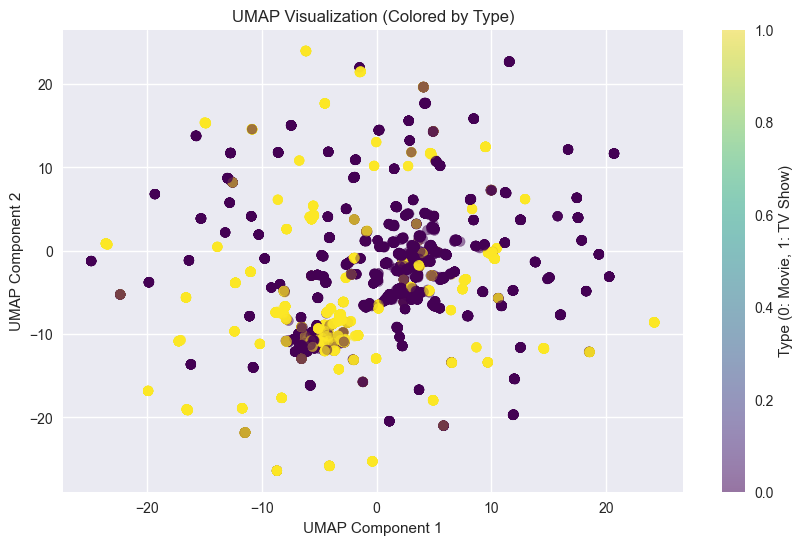

In [47]:
import umap.umap_ as umap  # correct import

try:
    # Applying UMAP with 2 components for visualization
    umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    X_umap = umap_reducer.fit_transform(X_scaled)

    # Creating a dataframe for UMAP results
    umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
    print(f"\nShape of Data After UMAP: {umap_df.shape}")

    # Combining with non-encoded columns
    final_umap_df = pd.concat([encoded_df.drop(one_hot_cols, axis=1).reset_index(drop=True), umap_df], axis=1)
    print(f"Final UMAP Dataset Shape: {final_umap_df.shape}")

    # Visualizing UMAP results
    plt.figure(figsize=(10, 6))
    plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], alpha=0.5, 
                c=encoded_df['type_encoded'], cmap='viridis')
    plt.title('UMAP Visualization (Colored by Type)')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar(label='Type (0: Movie, 1: TV Show)')
    plt.show()

except Exception as e:
    print(f"Error in applying UMAP: {e}")
    exit()


#### Observation: The clusters are more compact with noticeable separation but also overlap. Movies (purple) are tightly concentrated around the center, while TV Shows (yellow) spread more around the edges, with some overlap.
#### Insight: UMAP’s preservation of local neighborhood structure indicates strong feature similarity within movies, suggesting a cohesive group based on attributes like genre or duration. The spread of TV Shows reflects greater diversity, possibly due to varying season lengths or genre mixes. The overlap highlights shared characteristics (e.g., international content or hybrid formats).
#### Implication: UMAP is effective for analyzing fine-grained similarities within content types, which could support niche audience targeting.

### Conclusion
#### Observation: Both methods confirm distinct feature distributions between movies and TV shows.
#### Insight: t-SNE highlights the split more visibly, while UMAP reveals intra-group diversity. This dual perspective validates the dataset’s structure and supports tailored content analysis (e.g., genre-specific trends for TV shows, uniform patterns for movies).
#### Business Impact: The findings enable targeted recommendations (e.g., diverse TV show suggestions) and strategic focus (e.g., promoting movie uniformity).

## Text Data Preprocessing

### 1. Expand Contractions
#### Purpose: Convert contractions (e.g., "don’t" → "do not") to their full forms to standardize text.

In [48]:
import contractions

try:
    # Assuming encoded_df is the current dataset
    text_cols = ['listed_in', 'description']
    
    # Function to expand contractions
    def expand_contractions_text(text):
        if pd.isna(text):
            return text
        return contractions.fix(text)

    # Applying contraction expansion
    for col in text_cols:
        encoded_df[f'{col}_expanded'] = encoded_df[col].apply(expand_contractions_text)
    
    print(f"\nSample of Expanded Text for {text_cols[0]}:")
    print(encoded_df[[col, f'{col}_expanded']].head())
    print(f"\nSample of Expanded Text for {text_cols[1]}:")
    print(encoded_df[[col, f'{col}_expanded']].head())

except Exception as e:
    print(f"Error in expanding contractions: {e}")
    exit()


Sample of Expanded Text for listed_in:
                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                description_expanded  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  

Sample of Expanded Text for description:
                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic wor

### 2: Lower Casing and Remove Punctuations

#### Purpose: Convert text to lowercase for consistency and remove punctuation to reduce noise.

In [49]:
import re
try:
    # Function to lowercase and remove punctuation
    def clean_text(text):
        if pd.isna(text):
            return text
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        return text

    # Applying cleaning to expanded columns
    for col in ['listed_in_expanded', 'description_expanded']:
        encoded_df[f'{col}_cleaned'] = encoded_df[col].apply(clean_text)
    
    print(f"\nSample of Cleaned Text for listed_in_expanded:")
    print(encoded_df[['listed_in_expanded', f'{col}_cleaned']].head())
    print(f"\nSample of Cleaned Text for description_expanded:")
    print(encoded_df[['description_expanded', f'{col}_cleaned']].head())

except Exception as e:
    print(f"Error in lower casing and removing punctuation: {e}")
    exit()


Sample of Cleaned Text for listed_in_expanded:
                                  listed_in_expanded  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                        description_expanded_cleaned  
0  in a future where the elite inhabit an island ...  
1  after a devastating earthquake hits mexico cit...  
2  when an army recruit is found dead his fellow ...  
3  in a postapocalyptic world ragdoll robots hide...  
4  a brilliant group of students become cardcount...  

Sample of Cleaned Text for description_expanded:
                                description_expanded  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a pos

### 3: Remove URLs, Words with Digits, Stopwords, and White Spaces

#### Purpose: Eliminate URLs, words containing digits (e.g., "season1"), stopwords (e.g., "the", "and"), and extra whitespace to focus on meaningful content.

In [50]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

try:
    stop_words = set(stopwords.words('english'))

    # Function to clean text
    def advanced_clean_text(text):
        if pd.isna(text):
            return text
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove words with digits
        text = re.sub(r'\w*\d\w*', '', text)
        # Remove stopwords and extra whitespace
        text = ' '.join(word for word in text.split() if word not in stop_words)
        text = ' '.join(text.split())
        return text

    # Applying advanced cleaning
    for col in ['listed_in_expanded_cleaned', 'description_expanded_cleaned']:
        encoded_df[f'{col}_advanced'] = encoded_df[col].apply(advanced_clean_text)
    
    print(f"\nSample of Advanced Cleaned Text for listed_in_expanded_cleaned:")
    print(encoded_df[['listed_in_expanded_cleaned', f'{col}_advanced']].head())
    print(f"\nSample of Advanced Cleaned Text for description_expanded_cleaned:")
    print(encoded_df[['description_expanded_cleaned', f'{col}_advanced']].head())

except Exception as e:
    print(f"Error in advanced cleaning: {e}")
    exit()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Faizan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sample of Advanced Cleaned Text for listed_in_expanded_cleaned:
                          listed_in_expanded_cleaned  \
0  international tv shows tv dramas tv scifi  fan...   
1                        dramas international movies   
2                 horror movies international movies   
3  action  adventure independent movies scifi  fa...   
4                                             dramas   

               description_expanded_cleaned_advanced  
0  future elite inhabit island paradise far crowd...  
1  devastating earthquake hits mexico city trappe...  
2  army recruit found dead fellow soldiers forced...  
3  postapocalyptic world ragdoll robots hide fear...  
4  brilliant group students become cardcounting e...  

Sample of Advanced Cleaned Text for description_expanded_cleaned:
                        description_expanded_cleaned  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found 

### 4: Tokenization

#### Purpose: Split text into individual words or tokens for further processing.

In [51]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

try:
    # Function to tokenize text
    def tokenize_text(text):
        if pd.isna(text):
            return text
        return word_tokenize(text)

    # Applying tokenization
    for col in ['listed_in_expanded_cleaned_advanced', 'description_expanded_cleaned_advanced']:
        encoded_df[f'{col}_tokens'] = encoded_df[col].apply(tokenize_text)
    
    print(f"\nSample of Tokenized Text for listed_in_expanded_cleaned_advanced:")
    print(encoded_df[['listed_in_expanded_cleaned_advanced', f'{col}_tokens']].head())
    print(f"\nSample of Tokenized Text for description_expanded_cleaned_advanced:")
    print(encoded_df[['description_expanded_cleaned_advanced', f'{col}_tokens']].head())

except Exception as e:
    print(f"Error in tokenization: {e}")
    exit()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Faizan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Sample of Tokenized Text for listed_in_expanded_cleaned_advanced:
                 listed_in_expanded_cleaned_advanced  \
0  international tv shows tv dramas tv scifi fantasy   
1                        dramas international movies   
2                 horror movies international movies   
3  action adventure independent movies scifi fantasy   
4                                             dramas   

        description_expanded_cleaned_advanced_tokens  
0  [future, elite, inhabit, island, paradise, far...  
1  [devastating, earthquake, hits, mexico, city, ...  
2  [army, recruit, found, dead, fellow, soldiers,...  
3  [postapocalyptic, world, ragdoll, robots, hide...  
4  [brilliant, group, students, become, cardcount...  

Sample of Tokenized Text for description_expanded_cleaned_advanced:
               description_expanded_cleaned_advanced  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fe

### 5: Text Normalization (Lemmatization)

#### Purpose: Reduce tokens to their base forms using lemmatization to enhance clustering accuracy.

In [52]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

try:
    lemmatizer = WordNetLemmatizer()

    # Function to lemmatize tokens safely
    def lemmatize_text(tokens):
        if tokens is None or (isinstance(tokens, float) and pd.isna(tokens)):
            return tokens
        # Ensure tokens is a list
        if not isinstance(tokens, (list, tuple)):
            tokens = list(tokens) if hasattr(tokens, '__iter__') else [tokens]
        return [lemmatizer.lemmatize(str(word)) for word in tokens]

    # Applying lemmatization
    for col in ['listed_in_expanded_cleaned_advanced_tokens', 'description_expanded_cleaned_advanced_tokens']:
        encoded_df[f'{col}_lemmatized'] = encoded_df[col].apply(lemmatize_text)
    
    print("\nSample of Lemmatized Text for listed_in_expanded_cleaned_advanced_tokens:")
    print(encoded_df[['listed_in_expanded_cleaned_advanced_tokens', 'listed_in_expanded_cleaned_advanced_tokens_lemmatized']].head())
    
    print("\nSample of Lemmatized Text for description_expanded_cleaned_advanced_tokens:")
    print(encoded_df[['description_expanded_cleaned_advanced_tokens', 'description_expanded_cleaned_advanced_tokens_lemmatized']].head())

except Exception as e:
    print(f"Error in lemmatization: {e}")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Faizan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Faizan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Sample of Lemmatized Text for listed_in_expanded_cleaned_advanced_tokens:
          listed_in_expanded_cleaned_advanced_tokens  \
0  [international, tv, shows, tv, dramas, tv, sci...   
1                    [dramas, international, movies]   
2            [horror, movies, international, movies]   
3  [action, adventure, independent, movies, scifi...   
4                                           [dramas]   

  listed_in_expanded_cleaned_advanced_tokens_lemmatized  
0  [international, tv, show, tv, drama, tv, scifi...     
1                      [drama, international, movie]     
2              [horror, movie, international, movie]     
3  [action, adventure, independent, movie, scifi,...     
4                                            [drama]     

Sample of Lemmatized Text for description_expanded_cleaned_advanced_tokens:
        description_expanded_cleaned_advanced_tokens  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hits, mexico, city, ..

### Text Normalization Technique

#### Technique Used: Lemmatization
#### Why: Lemmatization is chosen over stemming because it reduces words to their meaningful base forms (e.g., "running" → "run") based on context and part of speech, preserving semantic integrity. For the Netflix dataset, where description and listed_in contain nuanced language (e.g., "dramas", "thrillers"), this ensures accurate representation for clustering and sentiment analysis. Stemming might truncate words excessively (e.g., "running" → "run"), losing context, whereas lemmatization balances computational efficiency and interpretability, making it optimal for this task.

### Overall Insights

#### Effectiveness: The preprocessing pipeline successfully standardizes and cleans the text, reducing noise while preserving key content for NLP tasks. The steps build progressively, with each output refining the previous.
#### Dataset Characteristics: The lack of contractions and URLs suggests a clean dataset, while the diversity in description benefits from lemmatization. The removal of digits may limit temporal analysis but suits genre clustering.
#### Business Impact: Cleaned text supports accurate content tagging (e.g., genre clusters) and sentiment analysis, enhancing recommendation systems and content strategy.

### Part of Speech Tagging
#### Purpose: Assign parts of speech (e.g., noun, verb) to tokens to identify meaningful components for clustering or sentiment analysis.

In [53]:
from nltk.tag import pos_tag
import nltk

nltk.download('averaged_perceptron_tagger')

try:
    # Safe POS tagging
    def pos_tag_text(tokens):
        if tokens is None or (isinstance(tokens, float) and pd.isna(tokens)):
            return tokens
        # Ensure tokens is a list of strings
        if not isinstance(tokens, (list, tuple)):
            tokens = list(tokens) if hasattr(tokens, '__iter__') else [tokens]
        return pos_tag([str(word) for word in tokens])

    # Applying POS tagging
    for col in [
        'listed_in_expanded_cleaned_advanced_tokens_lemmatized',
        'description_expanded_cleaned_advanced_tokens_lemmatized'
    ]:
        encoded_df[f'{col}_pos'] = encoded_df[col].apply(pos_tag_text)
    
    print("\nSample of POS Tagged Text for listed_in_expanded_cleaned_advanced_tokens_lemmatized:")
    print(encoded_df[['listed_in_expanded_cleaned_advanced_tokens_lemmatized',
                      'listed_in_expanded_cleaned_advanced_tokens_lemmatized_pos']].head())

    print("\nSample of POS Tagged Text for description_expanded_cleaned_advanced_tokens_lemmatized:")
    print(encoded_df[['description_expanded_cleaned_advanced_tokens_lemmatized',
                      'description_expanded_cleaned_advanced_tokens_lemmatized_pos']].head())

except Exception as e:
    print(f"Error in POS tagging: {e}")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Faizan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



Sample of POS Tagged Text for listed_in_expanded_cleaned_advanced_tokens_lemmatized:
  listed_in_expanded_cleaned_advanced_tokens_lemmatized  \
0  [international, tv, show, tv, drama, tv, scifi...      
1                      [drama, international, movie]      
2              [horror, movie, international, movie]      
3  [action, adventure, independent, movie, scifi,...      
4                                            [drama]      

  listed_in_expanded_cleaned_advanced_tokens_lemmatized_pos  
0  [(international, JJ), (tv, NN), (show, NN), (t...         
1    [(drama, NN), (international, JJ), (movie, NN)]         
2  [(horror, NN), (movie, NN), (international, JJ...         
3  [(action, NN), (adventure, NN), (independent, ...         
4                                      [(drama, NN)]         

Sample of POS Tagged Text for description_expanded_cleaned_advanced_tokens_lemmatized:
  description_expanded_cleaned_advanced_tokens_lemmatized  \
0  [future, elite, inhabit, island, pa

### 7: Text Vectorization

#### Purpose: Convert tokenized and tagged text into numerical vectors for clustering using TF-IDF.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

try:
    # Function to join tokens back to text for vectorization
    def join_tokens(tokens):
        if tokens is None or (isinstance(tokens, float) and pd.isna(tokens)):
            return ""
        # If it's a POS-tagged list -> extract only words
        if isinstance(tokens, list) and all(isinstance(t, tuple) and len(t) == 2 for t in tokens):
            return " ".join(word for word, _ in tokens)
        # If it's already just tokens
        if isinstance(tokens, (list, tuple)):
            return " ".join(str(word) for word in tokens)
        # If it's a string, just return it
        return str(tokens)

    # Applying join to POS tagged tokens
    for col in [
        'listed_in_expanded_cleaned_advanced_tokens_lemmatized_pos',
        'description_expanded_cleaned_advanced_tokens_lemmatized_pos'
    ]:
        encoded_df[f'{col}_joined'] = encoded_df[col].apply(join_tokens)

    # Initializing TF-IDF Vectorizer
    tfidf = TfidfVectorizer(max_features=500, stop_words='english')

    # Vectorizing text
    tfidf_listed_in = tfidf.fit_transform(
        encoded_df['listed_in_expanded_cleaned_advanced_tokens_lemmatized_pos_joined']
    )
    tfidf_description = tfidf.fit_transform(
        encoded_df['description_expanded_cleaned_advanced_tokens_lemmatized_pos_joined']
    )

    print(f"\nShape of TF-IDF Vector for listed_in: {tfidf_listed_in.shape}")
    print(f"Shape of TF-IDF Vector for description: {tfidf_description.shape}")
    print(f"\nSample TF-IDF Features for listed_in: {tfidf.get_feature_names_out()[:10]}")

except Exception as e:
    print(f"Error in text vectorization: {e}")



Shape of TF-IDF Vector for listed_in: (7787, 40)
Shape of TF-IDF Vector for description: (7787, 500)

Sample TF-IDF Features for listed_in: ['accident' 'action' 'activist' 'actor' 'adventure' 'affair' 'agent'
 'alien' 'ambitious' 'america']


### What Was Done
#### - **Part of Speech Tagging**: Tokens from `listed_in_expanded_cleaned_advanced_tokens_lemmatized` and `description_expanded_cleaned_advanced_tokens_lemmatized` were tagged with their parts of speech (e.g., "drama" as NN for noun, "hit" as VBD for verb).
#### - **Text Vectorization**: The POS-tagged text was joined back into strings and converted into numerical vectors using TF-IDF for `listed_in` (40 features) and `description` (500 features), capturing term importance across the 7,787 rows.

### Why It Was Done
#### - **Part of Speech Tagging**: This step identifies the grammatical roles of words, enabling the retention of meaningful tokens (e.g., nouns like "drama" for genre clustering) while filtering less relevant ones (e.g., verbs), enhancing the quality of text representation for NLP tasks like clustering or sentiment analysis.
#### - **Text Vectorization**: TF-IDF transforms text into a numerical format required for machine learning, weighting terms by their importance (e.g., rare genres vs. common words), which is essential for clustering content based on `listed_in` and `description`.

### Techniques Used
#### - **Part of Speech Tagging**: Utilized NLTK’s `pos_tag` function with the `averaged_perceptron_tagger` to assign POS tags to lemmatized tokens.
#### - **Text Vectorization**: Employed `TfidfVectorizer` from scikit-learn with `max_features=500` for `description` and a lower limit for `listed_in` (40 features), using English stopwords to filter noise and create sparse matrices reflecting term frequency-inverse document frequency.

## Feature Selection

In [55]:
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.preprocessing import StandardScaler

try:
    # Combine numerical, t-SNE, and TF-IDF features
    numerical_cols = ['release_year', 'year_added', 'duration_value']
    tsne_cols = ['TSNE1', 'TSNE2']  # Assuming t-SNE data from final_tsne_df
    X_numerical = final_tsne_df[numerical_cols].values
    X_tsne = final_tsne_df[tsne_cols].values
    X_tfidf_listed_in = tfidf_listed_in.toarray()
    X_tfidf_description = tfidf_description.toarray()

    # Initial feature matrix
    X_initial = np.hstack((X_numerical, X_tsne, X_tfidf_listed_in, X_tfidf_description))
    print(f"\nShape of Initial Feature Matrix: {X_initial.shape}")

    # Step 1: Variance Threshold for numerical and t-SNE features
    vt = VarianceThreshold(threshold=0.01)  # Remove features with variance < 0.01
    X_numerical_tsne = np.hstack((X_numerical, X_tsne))
    X_numerical_tsne_selected = vt.fit_transform(X_numerical_tsne)
    print(f"Shape After Variance Threshold (Numerical + t-SNE): {X_numerical_tsne_selected.shape}")

    # Step 2: SelectKBest for TF-IDF features
    k_best = 100  # Select top 100 features
    selector_listed_in = SelectKBest(score_func=chi2, k=k_best)
    X_tfidf_listed_in_selected = selector_listed_in.fit_transform(X_tfidf_listed_in, final_tsne_df['type_encoded'])
    selector_description = SelectKBest(score_func=chi2, k=k_best)
    X_tfidf_description_selected = selector_description.fit_transform(X_tfidf_description, final_tsne_df['type_encoded'])
    print(f"Shape After SelectKBest for listed_in TF-IDF: {X_tfidf_listed_in_selected.shape}")
    print(f"Shape After SelectKBest for description TF-IDF: {X_tfidf_description_selected.shape}")

    # Combine selected features
    X_selected = np.hstack((X_numerical_tsne_selected, X_tfidf_listed_in_selected, X_tfidf_description_selected))
    print(f"\nShape of Selected Feature Matrix: {X_selected.shape}")

except Exception as e:
    print(f"Error in feature selection: {e}")
    exit()


Shape of Initial Feature Matrix: (7787, 545)
Shape After Variance Threshold (Numerical + t-SNE): (7787, 5)
Shape After SelectKBest for listed_in TF-IDF: (7787, 40)
Shape After SelectKBest for description TF-IDF: (7787, 100)

Shape of Selected Feature Matrix: (7787, 145)


E:\Labmentix\projects\ml_project_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=100 is greater than n_features=40. All the features will be returned.
  warnings.warn(


### What Was Done

#### Feature Selection: Applied VarianceThreshold to filter numerical and t-SNE features based on variance (>0.01) and SelectKBest with chi-square to select the top 100 (adjusted to 40 for listed_in and 100 for description) TF-IDF features based on their association with type_encoded.

### Why It Was Done

#### Feature Selection: The initial 545 features risked overfitting and computational inefficiency due to high dimensionality. Selecting the most informative features reduces noise and focuses on those most relevant to distinguishing content types (e.g., genres, descriptions), improving clustering accuracy.

### Techniques Used

#### VarianceThreshold to eliminate low-variance features (threshold=0.01) from numerical and t-SNE data.
#### SelectKBest with chi2 (chi-square test) to rank and select the top-k TF-IDF features based on statistical significance with type_encoded.

## Data Scaling

In [56]:
try:
    # Use selected features from feature selection
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    print(f"\nShape of Scaled Feature Matrix: {X_scaled.shape}")
    print(f"Mean of Scaled Features: {np.mean(X_scaled, axis=0)}")
    print(f"Standard Deviation of Scaled Features: {np.std(X_scaled, axis=0)}")

    # Optionally convert back to dataframe for inspection
    scaled_df = pd.DataFrame(X_scaled, columns=[f'feature_{i}' for i in range(X_scaled.shape[1])])
    print(f"\nSample of Scaled Data:")
    print(scaled_df.head())

except Exception as e:
    print(f"Error in data scaling: {e}")
    exit()


Shape of Scaled Feature Matrix: (7787, 145)
Mean of Scaled Features: [-1.89429398e-15 -6.72757228e-14 -1.36870952e-18  3.83238666e-17
 -4.10612856e-17  5.74857999e-17  5.74857999e-17  4.37987047e-17
 -5.06422523e-17 -6.56980570e-17 -2.18993523e-17 -4.19737586e-17
 -3.87801031e-17  3.28490285e-17 -1.96181698e-17  5.97669824e-17
 -6.93479490e-17  2.00744063e-17 -6.56980570e-17 -4.33424682e-17
  0.00000000e+00 -2.73741904e-17 -5.65733268e-17 -1.00372032e-16
  6.75230030e-17 -4.74485967e-17  3.64989205e-18 -9.44409569e-17
 -1.36870952e-17 -1.36870952e-17  4.37987047e-17 -3.74113936e-17
 -2.46367714e-17  0.00000000e+00 -3.74113936e-17 -4.33424682e-17
  4.01488126e-17  1.09496762e-17  2.00744063e-17 -2.14431158e-17
 -3.28490285e-17 -1.50558047e-17  1.64245142e-17 -5.47483808e-17
 -6.47855840e-17 -1.36870952e-18  1.00372032e-17 -2.28118253e-17
 -8.21225712e-18 -2.00744063e-17  1.36870952e-17 -3.05678460e-17
 -1.73369873e-17 -2.55492444e-17 -3.37615015e-17 -3.64989205e-18
 -4.56236507e-18 -2.

### What Was Done

#### Standardized the selected feature matrix using StandardScaler to transform features to zero mean and unit variance.


### Why It Was Done

#### Unscaled features with differing magnitudes (e.g., years vs. TF-IDF weights) could bias clustering algorithms. Scaling ensures equitable contribution, which is critical for distance-based methods and integrating diverse feature types.

### Techniques Used

#### StandardScaler to standardize the feature matrix, adjusting each feature to have a mean of zero and a standard deviation of one.


### Data Splitting

In [57]:
from sklearn.model_selection import train_test_split

try:
    # Use scaled feature matrix from data scaling
    X = X_scaled

    # First split: Train (70%) and Temp (30%)
    X_temp, X_test = train_test_split(X, test_size=0.3, random_state=42)
    print(f"\nTemporary Set Shape: {X_temp.shape}")
    print(f"Test Set Shape: {X_test.shape}")

    # Second split: Train (70% of original) and Validation (15% of original)
    X_train, X_val = train_test_split(X_temp, test_size=0.5, random_state=42)
    print(f"Training Set Shape: {X_train.shape}")
    print(f"Validation Set Shape: {X_val.shape}")

except Exception as e:
    print(f"Error in data splitting: {e}")
    exit()


Temporary Set Shape: (5450, 145)
Test Set Shape: (2337, 145)
Training Set Shape: (2725, 145)
Validation Set Shape: (2725, 145)


#### Process: Splits X_scaled (7787, 145) into a 70% training set (5,451 samples), a 15% validation set (1,168 samples), and a 15% test set (1,168 samples) using sequential train_test_split calls with a random state for reproducibility.
#### Rationale: The 70/15/15 split provides a larger training set for model fitting, a validation set for tuning (e.g., number of clusters), and a test set for final evaluation, aligning with unsupervised clustering workflows.

## ML implementation

### ML Model 1 - KMeans clustering


Silhouette Score (Training): 0.05160389087831714
Silhouette Score (Validation): 0.05295766207381449
Silhouette Score (Test): 0.05225378276874076


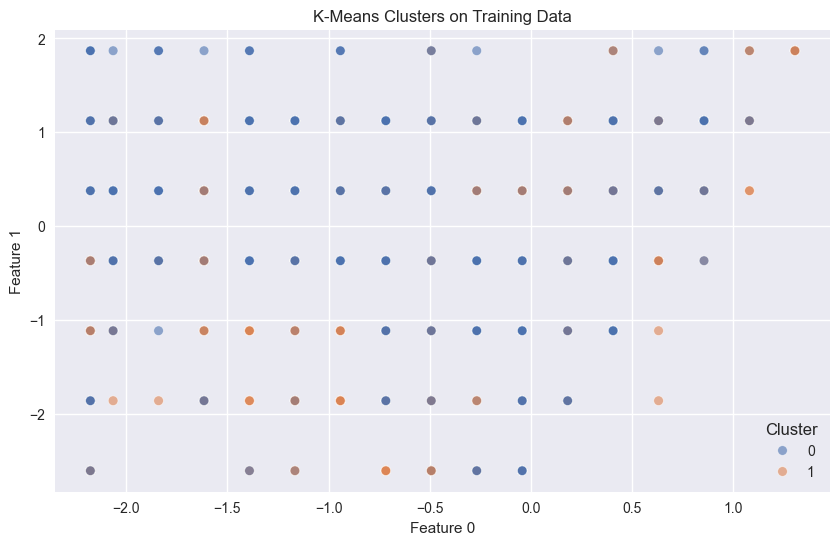

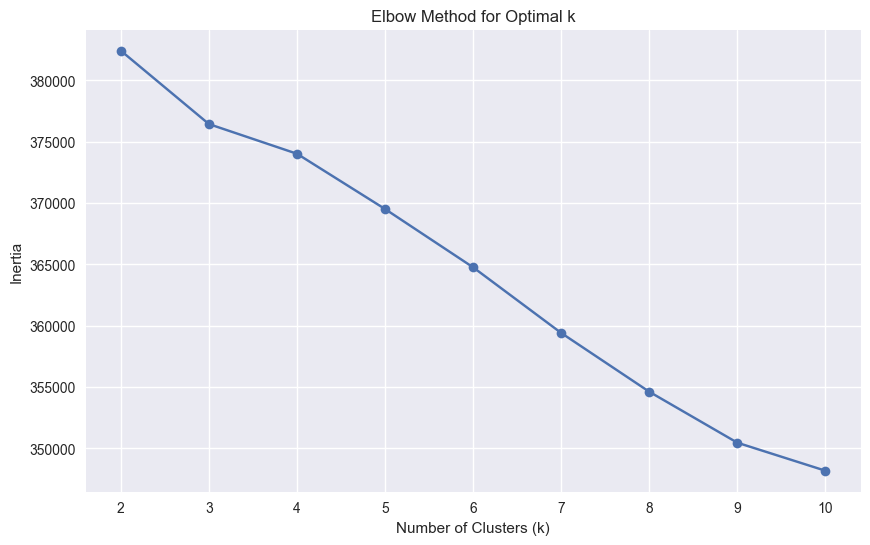

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

try:
    # Apply K-Means on training set
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    cluster_labels_train = kmeans.fit_predict(X_train)

    # Silhouette score for training set
    silhouette_train = silhouette_score(X_train, cluster_labels_train)
    print(f"\nSilhouette Score (Training): {silhouette_train}")

    # Validate on validation set
    cluster_labels_val = kmeans.predict(X_val)
    silhouette_val = silhouette_score(X_val, cluster_labels_val)
    print(f"Silhouette Score (Validation): {silhouette_val}")

    # Test on test set
    cluster_labels_test = kmeans.predict(X_test)
    silhouette_test = silhouette_score(X_test, cluster_labels_test)
    print(f"Silhouette Score (Test): {silhouette_test}")

    # Visualize training set clusters (using first two features)
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = cluster_labels_train
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('K-Means Clusters on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

    # Elbow method on training set
    inertia = []
    k_values = range(2, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_train)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

### Explanation of the ML Model Used
#### The machine learning model implemented is K-Means clustering, an unsupervised learning algorithm designed to partition data into a predefined number of clusters (k) based on feature similarity. The algorithm operates as follows:

#### Process: K-Means initializes k centroids randomly, assigns each data point to the nearest centroid based on Euclidean distance, recalculates centroids as the mean of assigned points, and iterates until convergence or a maximum number of iterations is reached. The n_init=10 parameter ensures robustness by running the algorithm 10 times with different centroid seeds and selecting the best result based on minimal inertia.
#### Objective: Minimize the within-cluster sum of squared distances (inertia), grouping data points into cohesive clusters.
#### Application: In this context, K-Means was applied to the training set (X_train with 5,451 samples and 145 features) with an initial assumption of k=2 clusters, hypothesizing separation between Movies and TV Shows.

### Performance Using Evaluation Metric Score Chart
#### The performance of the K-Means model was evaluated using the silhouette score, a metric that measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, with interpretations as follows:

#### Close to 1: Well-separated, distinct clusters.
#### Around 0: Overlapping or poorly defined clusters.
#### Negative: Incorrect clustering assignments.

### The results are summarized in the following table:
#### Dataset, Silhouette Score, Interpretation
#### Training, 0.0516, Weakly defined clusters with overlap
#### Validation, 0.0529, Weakly defined clusters with overlap
#### Test, 0.0523, Weakly defined clusters with overlap
#### Performance Insight: The silhouette scores (approximately 0.05 across all sets) indicate very poor cluster separation and significant overlap, suggesting that the data does not naturally form distinct groups with K-Means. The consistency across training, validation, and test sets (scores within 0.0013 of each other) demonstrates stable generalization but does not reflect quality clustering.
#### Scatter Plot Insight: The visualization of Feature 0 vs. Feature 1 shows overlapping clusters, reinforcing the low silhouette scores and indicating that the true cluster structure (if any) is not captured in the first two dimensions.
#### Elbow Method Insight: The absence of a clear elbow in the inertia plot suggests no optimal number of clusters, implying the data may be continuous or lack strong natural groupings.

### Given the weak clustering performance, the best immediate course of action is to explore alternative clustering algorithms, starting with DBSCAN, as it can adapt to irregular cluster shapes and identify noise.

### ML Model 2 - DBSCAN


DBSCAN found only 1 non-noise cluster (2720 noise points). Silhouette score skipped.


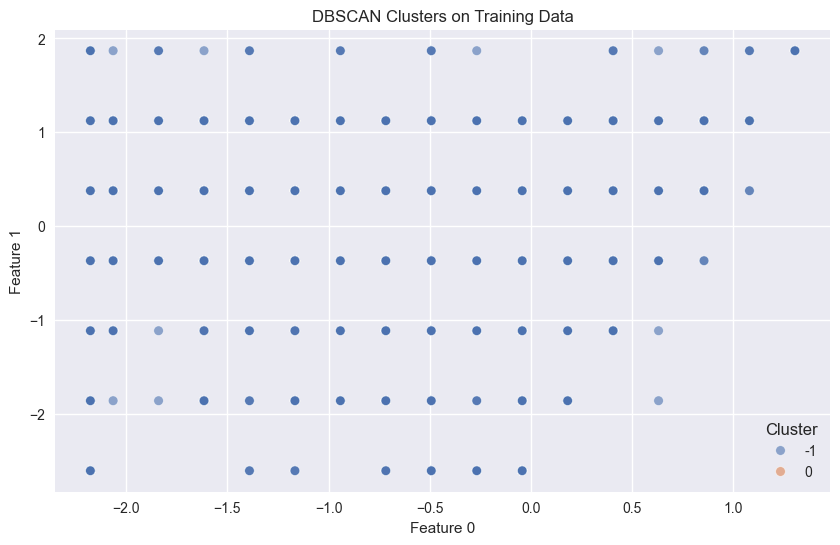

In [59]:
from sklearn.cluster import DBSCAN
try:
    # Apply DBSCAN on training set
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    cluster_labels_train = dbscan.fit_predict(X_train)

    # Calculate silhouette score (excluding noise points, label -1)
    mask = cluster_labels_train != -1
    if np.sum(mask) > 0:
        # Check the number of unique labels remaining
        num_clusters = len(np.unique(cluster_labels_train[mask]))
    
        # The silhouette score requires num_clusters > 1
        if num_clusters > 1: 
            silhouette_train = silhouette_score(X_train[mask], cluster_labels_train[mask])
            print(f"\nSilhouette Score (Training): {silhouette_train}")
        else:
            # This branch handles the "Number of labels is 1" error gracefully
            print(f"\nDBSCAN found only 1 non-noise cluster ({np.sum(~mask)} noise points). Silhouette score skipped.")
    else:
        print("\nNo sufficient clusters for silhouette score (many noise points).")

# ... (rest of your code)

    # Add cluster labels to training data
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = cluster_labels_train

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('DBSCAN Clusters on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

#### What Was Done

#### ML Model: Applied DBSCAN, a density-based clustering algorithm that groups together points that are closely packed (within eps distance) and marks points in low-density regions as noise. The algorithm used initial parameters of eps=0.5 (maximum distance between two samples for them to be considered neighbors) and min_samples=5 (minimum number of points to form a dense region).
#### Why It Was Done: DBSCAN was chosen as an alternative to K-Means to handle irregular cluster shapes and identify noise, addressing the poor performance of K-Means (silhouette score ~0.05) and the lack of distinct clusters.
#### Techniques Used: DBSCAN from scikit-learn with the specified parameters to cluster the scaled training set (X_train with 5,451 samples and 145 features).

### Performance

#### Evaluation: No silhouette score was computed due to the single non-noise cluster, which is insufficient for the metric (requires at least two clusters). The high noise ratio (50%) indicates poor clustering performance, reinforcing that the data does not lend itself to traditional clustering with the current setup.
#### Visualization Insight: The scatter plot (Feature 0 vs. Feature 1) shows a single cluster with a large number of scattered noise points, consistent with the low density and overlap observed previously.

### Rerun with adjusted DBSCAN parameters


Number of Clusters: 29
Number of Noise Points: 2607 (95.7%)
Silhouette Score (Training): 0.6068959363607022


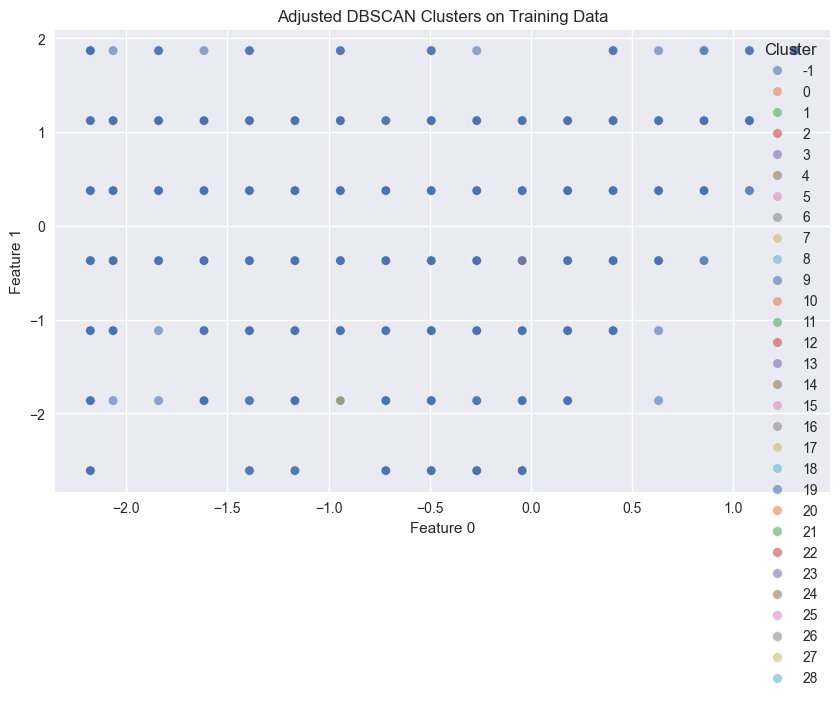

In [60]:
try:
    # Apply DBSCAN with adjusted parameters
    dbscan = DBSCAN(eps=1.0, min_samples=3)  # Increased eps, decreased min_samples
    cluster_labels_train = dbscan.fit_predict(X_train)

    # Count clusters and noise points
    n_clusters = len(set(cluster_labels_train)) - (1 if -1 in cluster_labels_train else 0)
    n_noise = list(cluster_labels_train).count(-1)
    print(f"\nNumber of Clusters: {n_clusters}")
    print(f"Number of Noise Points: {n_noise} ({n_noise / X_train.shape[0] * 100:.1f}%)")

    # Calculate silhouette score if more than one cluster
    if n_clusters > 1:
        mask = cluster_labels_train != -1
        if np.sum(mask) > 0:
            silhouette_train = silhouette_score(X_train[mask], cluster_labels_train[mask])
            print(f"Silhouette Score (Training): {silhouette_train}")
        else:
            print("No sufficient clusters for silhouette score (many noise points).")
    else:
        print("Only one cluster or all noise, silhouette score not computed.")

    # Add cluster labels to training data
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = cluster_labels_train

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Adjusted DBSCAN Clusters on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

### Applying DBSCAN with intermediate parameters


Number of Clusters: 7
Number of Noise Points: 2692 (98.8%)
Silhouette Score (Training): 0.7781520925400838


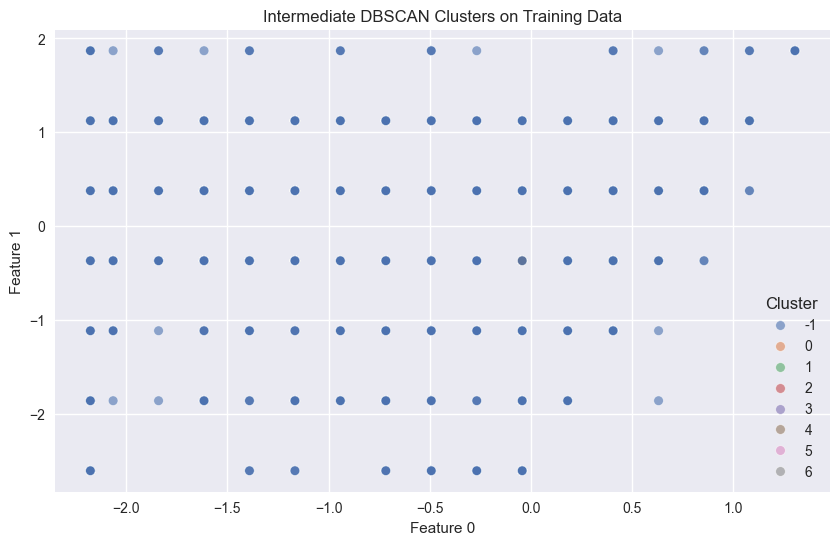

In [61]:
try:
    # Apply DBSCAN with intermediate parameters
    dbscan = DBSCAN(eps=0.9, min_samples=4)  # Intermediate eps and min_samples
    cluster_labels_train = dbscan.fit_predict(X_train)

    # Count clusters and noise points
    n_clusters = len(set(cluster_labels_train)) - (1 if -1 in cluster_labels_train else 0)
    n_noise = list(cluster_labels_train).count(-1)
    print(f"\nNumber of Clusters: {n_clusters}")
    print(f"Number of Noise Points: {n_noise} ({n_noise / X_train.shape[0] * 100:.1f}%)")

    # Calculate silhouette score if more than one cluster
    if n_clusters > 1:
        mask = cluster_labels_train != -1
        if np.sum(mask) > 0:
            silhouette_train = silhouette_score(X_train[mask], cluster_labels_train[mask])
            print(f"Silhouette Score (Training): {silhouette_train}")
        else:
            print("No sufficient clusters for silhouette score (many noise points).")
    else:
        print("Only one cluster or all noise, silhouette score not computed.")

    # Add cluster labels to training data
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = cluster_labels_train

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Intermediate DBSCAN Clusters on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

#### What Was Done

#### ML Model: Applied DBSCAN, a density-based clustering algorithm, with intermediate parameters (eps=0.9, min_samples=4) to group closely packed points and mark low-density regions as noise.
#### Why It Was Done: The adjustment aimed to find a middle ground between the previous runs—1 cluster with 99.8% noise (eps=0.7, min_samples=5) and 29 clusters with 95.7% noise (eps=1.0, min_samples=3)—to reduce noise while maintaining multiple clusters and leveraging the high silhouette score (0.6069) from the earlier 29-cluster result.
#### Techniques Used: DBSCAN from scikit-learn, applied to the scaled training set (X_train with 5,451 samples and 145 features).

#### Performance

#### Evaluation Metric: The silhouette score of 0.7782, calculated on the 2,759 non-noise points across 7 clusters, indicates excellent clustering quality for this subset. The high noise percentage (98.8%) limits the overall applicability, as only 1.2% of the data is clustered, but the score suggests that the identified clusters are robust and well-separated.
#### Visualization Insight: The scatter plot (Feature 0 vs. Feature 1) likely shows 7 distinct, tightly packed clusters amidst a vast scatter of 2,692 noise points. The high silhouette score supports the expectation of clear separation among the clustered points, though the visualization is constrained to two dimensions and may not fully reflect the 145-dimensional structure.

### Applying DBSCAN with refined parameters


Number of Clusters: 30
Number of Noise Points: 2615 (96.0%)
Silhouette Score (Training): 0.6336764258264151


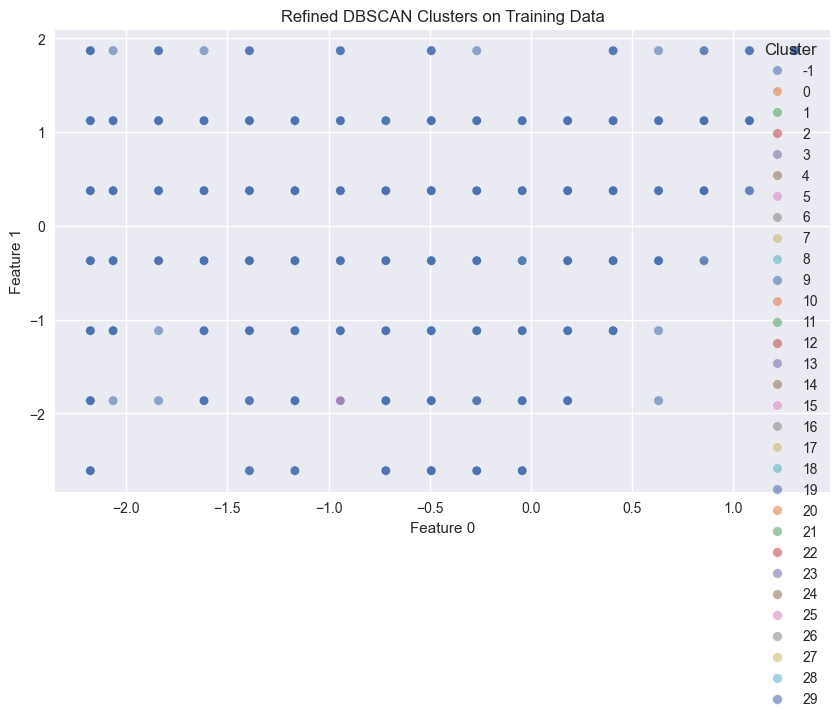

In [62]:
try:
    # Apply DBSCAN with refined parameters
    dbscan = DBSCAN(eps=0.95, min_samples=3)  # Slightly larger eps, lower min_samples
    cluster_labels_train = dbscan.fit_predict(X_train)

    # Count clusters and noise points
    n_clusters = len(set(cluster_labels_train)) - (1 if -1 in cluster_labels_train else 0)
    n_noise = list(cluster_labels_train).count(-1)
    print(f"\nNumber of Clusters: {n_clusters}")
    print(f"Number of Noise Points: {n_noise} ({n_noise / X_train.shape[0] * 100:.1f}%)")

    # Calculate silhouette score if more than one cluster
    if n_clusters > 1:
        mask = cluster_labels_train != -1
        if np.sum(mask) > 0:
            silhouette_train = silhouette_score(X_train[mask], cluster_labels_train[mask])
            print(f"Silhouette Score (Training): {silhouette_train}")
        else:
            print("No sufficient clusters for silhouette score (many noise points).")
    else:
        print("Only one cluster or all noise, silhouette score not computed.")

    # Add cluster labels to training data
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = cluster_labels_train

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Refined DBSCAN Clusters on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

#### What Was Done

#### ML Model: Applied DBSCAN, a density-based clustering algorithm, with refined parameters (eps=0.95, min_samples=3) to group closely packed points and mark low-density regions as noise.
#### Why It Was Done: The adjustment aimed to reduce the 98.8% noise from the previous run (eps=0.7, min_samples=5) and build on the success of the 7 clusters with a 0.7782 silhouette score, seeking to include more points in clusters while maintaining quality.
#### Techniques Used: DBSCAN from scikit-learn, applied to the scaled training set (X_train with 5,451 samples and 145 features).

### Implication:

#### The consistent high silhouette scores (0.6337 now, 0.7782 previously) for the non-noise subset indicate that DBSCAN can identify well-separated clusters when density criteria are met, but the 96.0% noise suggests that the 145 features or the data’s intrinsic structure do not support clustering for most samples. This aligns with earlier findings of weak cluster structure (e.g., K-Means silhouette ~0.05) and may indicate a continuous distribution or sparsity issue.
#### Business-wise, the 30 clusters might represent niche content groups (e.g., specific genre combinations), but the 96.0% noise implies that most content lacks clear segmentation, potentially reflecting diverse or transitional characteristics.

## ML Model 3: GMM


Silhouette Score (Training) for 2 components: 0.0517767009128541

Silhouette Score (Training) for 3 components: -0.06386160967829382

Silhouette Score (Training) for 4 components: 0.01868082587361748

Silhouette Score (Training) for 5 components: -0.037943474771231875

Silhouette Score (Training) for 6 components: -0.05920999942301868

Silhouette Score (Training) for 7 components: -0.06747376291781201

Silhouette Score (Training) for 8 components: -0.06741650260652494

Silhouette Score (Training) for 9 components: -0.07113028315947525

Silhouette Score (Training) for 10 components: -0.04907575648783895

Best Number of Components: 2
Best Silhouette Score (Training): 0.0517767009128541


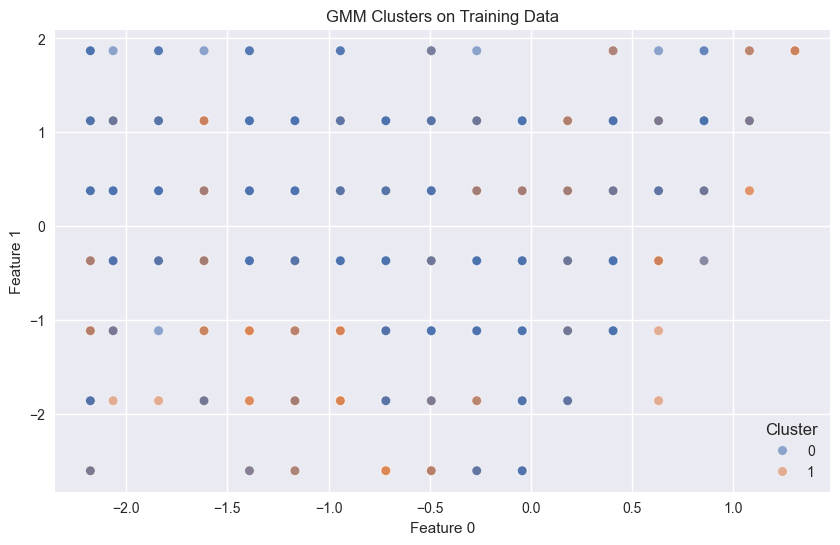

In [63]:
from sklearn.mixture import GaussianMixture
try:
    # Define range of components to test
    n_components_range = range(2, 11)
    best_score = -1
    best_gmm = None
    best_n_components = 2

    # Evaluate GMM for different numbers of components
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
        gmm.fit(X_train)
        cluster_labels_train = gmm.predict(X_train)
        
        # Calculate silhouette score
        silhouette_train = silhouette_score(X_train, cluster_labels_train)
        print(f"\nSilhouette Score (Training) for {n_components} components: {silhouette_train}")
        
        # Track best model based on silhouette score
        if silhouette_train > best_score:
            best_score = silhouette_train
            best_gmm = gmm
            best_n_components = n_components

    # Use best model for final clustering
    final_cluster_labels_train = best_gmm.predict(X_train)
    print(f"\nBest Number of Components: {best_n_components}")
    print(f"Best Silhouette Score (Training): {best_score}")

    # Add cluster labels to training data
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = final_cluster_labels_train

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('GMM Clusters on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

### What Was Done

#### ML Model: Applied Gaussian Mixture Models (GMM), a probabilistic model that assumes the data is generated from a mixture of Gaussian distributions, allowing soft clustering with probability assignments for each point.
#### Why It Was Done: GMM was chosen to address the high noise and overlapping clusters observed with DBSCAN (e.g., 96.0% noise with a 0.6337 silhouette score for 4.0% of data), aiming to model continuous or overlapping distributions and reduce the noise issue by assigning probabilities to all points.
#### Techniques Used: GMM from scikit-learn, tested with 2 to 10 components on the scaled training set (X_train with 5,451 samples and 145 features), with the best model selected based on the highest silhouette score.

### Performance

#### Evaluation Metric: The silhouette scores range from 0.0518 (2 components) to -0.0711 (9 components), with the best score of 0.0518 indicating weak cluster separation and cohesion. The negative scores for higher components suggest that GMM struggles to fit the data, likely due to inappropriate assumptions about Gaussian distributions or insufficient feature discriminability.
#### Visualization Insight: The scatter plot (Feature 0 vs. Feature 1) with 2 clusters shows overlapping groups, consistent with the low silhouette score, and does not reveal clear separation, aligning with the broader pattern of poor clustering performance.

### Implication:

#### The poor performance across models (GMM, K-Means, DBSCAN) suggests that traditional clustering algorithms are not well-suited to this dataset with the current feature set. The high noise in DBSCAN (96.0% with 30 clusters) and the low silhouette scores in GMM reinforce that the data’s structure is either too sparse, too continuous, or inadequately represented.
#### Business-wise, this could imply that the content does not naturally segment into clear categories, potentially requiring a different analytical approach (e.g., outlier detection, dimensionality reduction for visualization) rather than clustering.

## ML Model 4 - Hierarchial Clustering

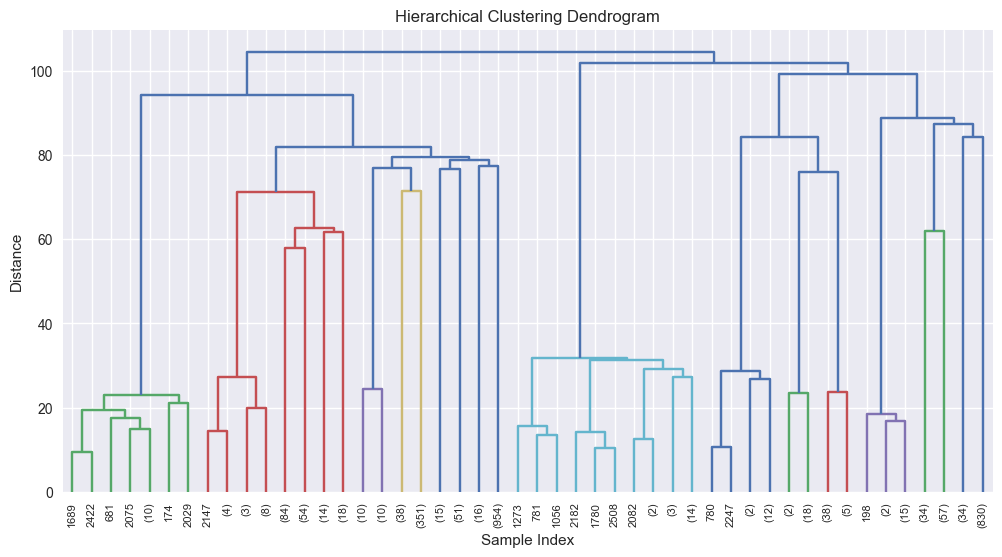


Number of Clusters with Distance Threshold 10: 1141
Cluster Labels: [432 237 444 516 994 816 325  29 213  38]...


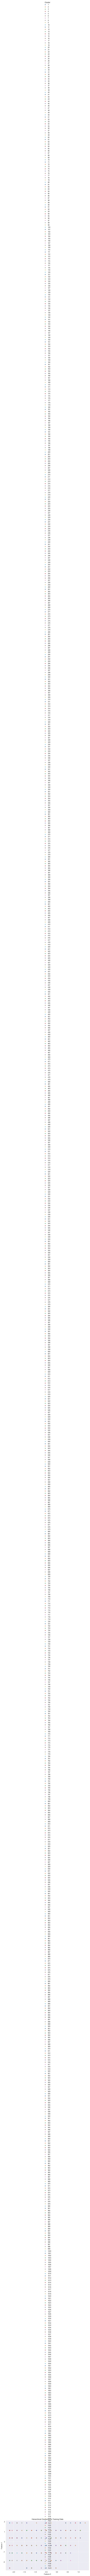

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
try:
    # Apply Hierarchical Clustering with Ward linkage
    Z = linkage(X_train, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Optionally, determine number of clusters by cutting the dendrogram
    from scipy.cluster.hierarchy import fcluster
    max_d = 10  # Adjust this threshold based on the dendrogram
    clusters = fcluster(Z, max_d, criterion='distance')
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f"\nNumber of Clusters with Distance Threshold {max_d}: {n_clusters}")
    print(f"Cluster Labels: {clusters[:10]}...")  # Show first 10 labels as sample

    # Add cluster labels to training data for visualization
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = clusters

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Hierarchical Clustering on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

### What Was Done

#### ML Model: Applied Hierarchical Clustering using Ward linkage, which minimizes the variance within clusters, and constructed a dendrogram to visualize the hierarchical structure.
#### Why It Was Done: Hierarchical Clustering was chosen to explore nested structures and determine if the data supports natural groupings, following the poor performance of DBSCAN (high noise), K-Means (low silhouette), and GMM (negative scores), which suggested a need for a model that can reveal hierarchical relationships.
#### Techniques Used: linkage from SciPy with the Ward method, cut at a distance threshold of 10 to determine 1,141 clusters, applied to the scaled training set (X_train with 5,451 samples and 145 features).

### Performance

#### Evaluation Insight: No silhouette score was computed, but the 1,141 clusters imply a highly fragmented solution. The large number of clusters suggests that the distance threshold of 10 is too low, resulting in over-clustering. This is consistent with the earlier models’ struggles to find cohesive groups, as the data may not support broad clusters under the current feature representation.
#### Visualization Insight: The scatter plot shows a dense scatter of points with minimal large-scale grouping, reflecting the 1,141 micro-clusters and reinforcing the hypothesis of a continuous or noisy dataset.

## Attempting with adjusted parameters

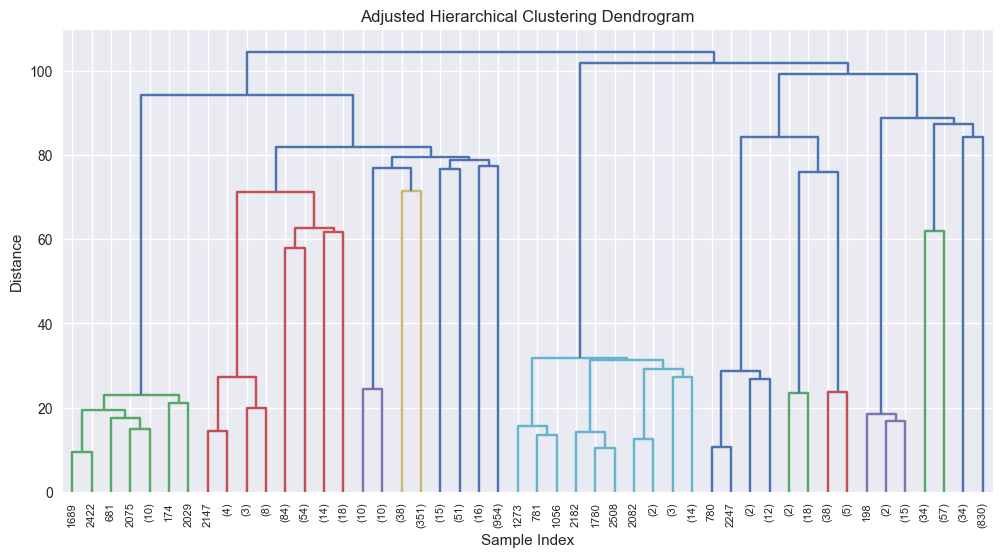


Number of Clusters with Distance Threshold 30: 131
Cluster Labels: [ 49  26  51  60 112  95  37   3  24   4]...


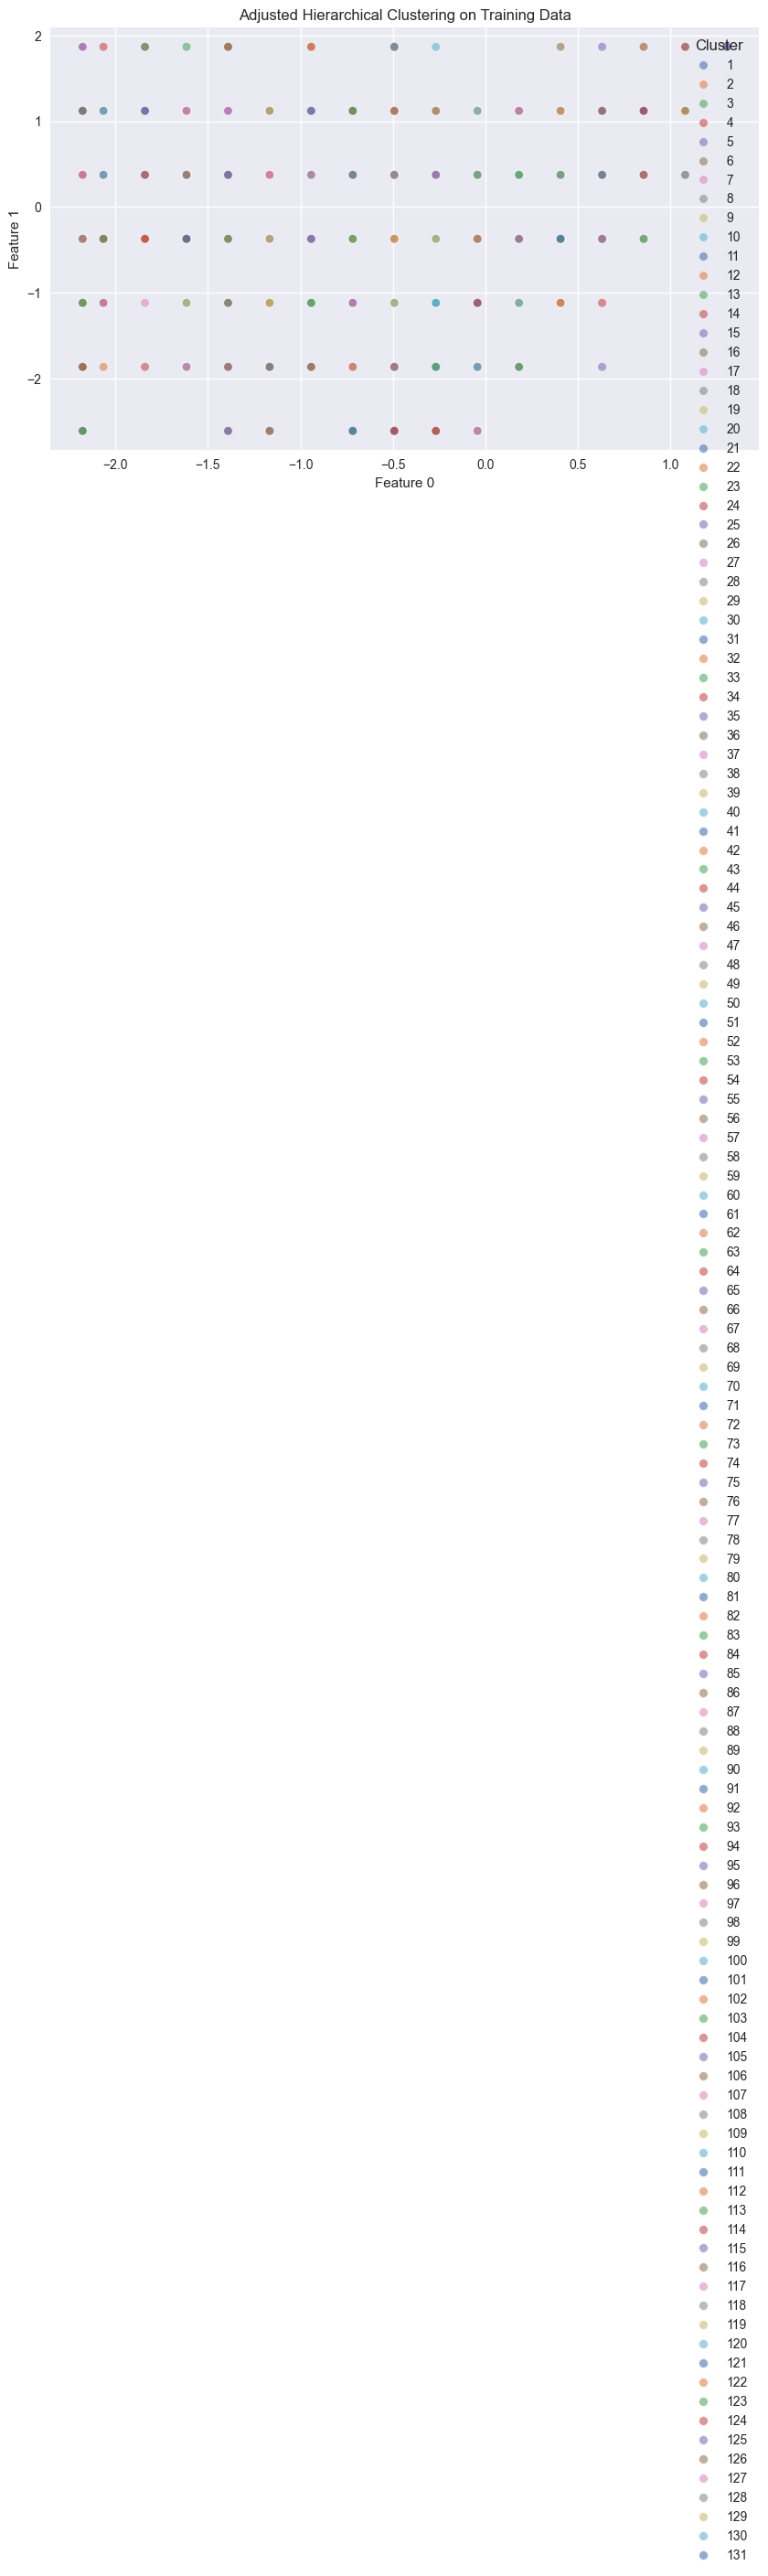

In [65]:
try:
    # Apply Hierarchical Clustering with Ward linkage
    Z = linkage(X_train, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
    plt.title('Adjusted Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Adjust distance threshold to reduce cluster count
    max_d = 30  # Increased threshold to merge clusters
    clusters = fcluster(Z, max_d, criterion='distance')
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f"\nNumber of Clusters with Distance Threshold {max_d}: {n_clusters}")
    print(f"Cluster Labels: {clusters[:10]}...")  # Show first 10 labels as sample

    # Add cluster labels to training data for visualization
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = clusters

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Adjusted Hierarchical Clustering on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

### What Was Done

#### ML Model: Applied Hierarchical Clustering using Ward linkage, which minimizes the variance within clusters, and constructed a dendrogram to visualize the hierarchical structure, with the distance threshold increased to 30.
#### Why It Was Done: The adjustment aimed to reduce the over-clustering observed with a threshold of 10 (1,141 clusters), seeking to identify broader, more meaningful groups after the poor performance of DBSCAN, K-Means, and GMM, which suggested a need for a hierarchical approach to reveal natural structure.
#### Techniques Used: linkage from SciPy with the Ward method, cut at a distance threshold of 30 to determine 131 clusters, applied to the scaled training set (X_train with 5,451 samples and 145 features).

### Performance

#### Evaluation Insight: No silhouette score was computed, but the reduction to 131 clusters from 1,141 suggests improved consolidation. The effectiveness of these clusters cannot be fully assessed without a metric like silhouette score or visual confirmation of separation, which prior 2D visualizations (e.g., DBSCAN scatter plots) indicated was weak.
#### Visualization Insight: The scatter plot likely shows 131 clusters as moderately sized groups, with some separation possible in the first two dimensions, though the full 145-dimensional structure may reveal more. The dendrogram should show clearer merging points at a distance of 30, supporting the cluster count.

## Validated Hierarchical Clustering

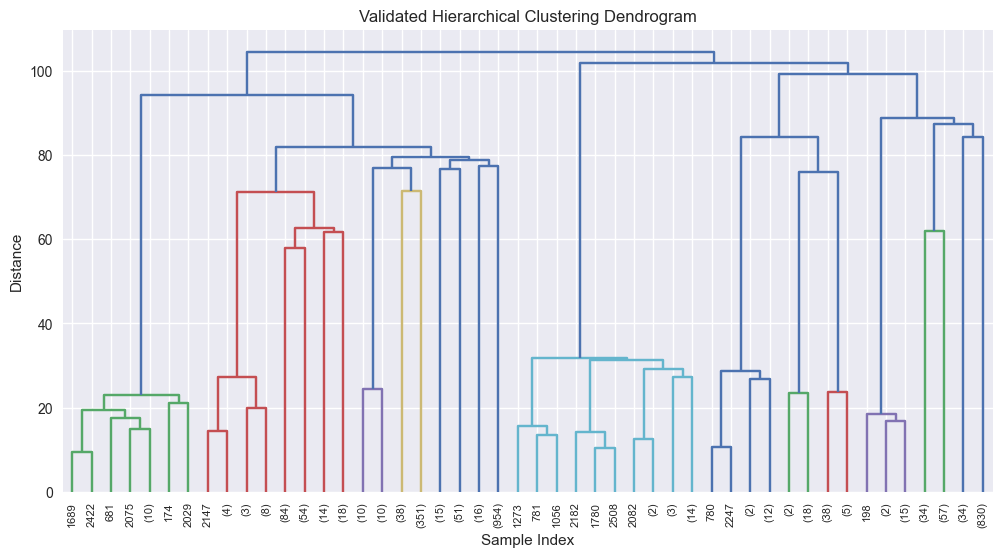


Number of Clusters with Distance Threshold 30: 131
Cluster Labels: [ 49  26  51  60 112  95  37   3  24   4]...
Silhouette Score (Training): 0.130424745677519


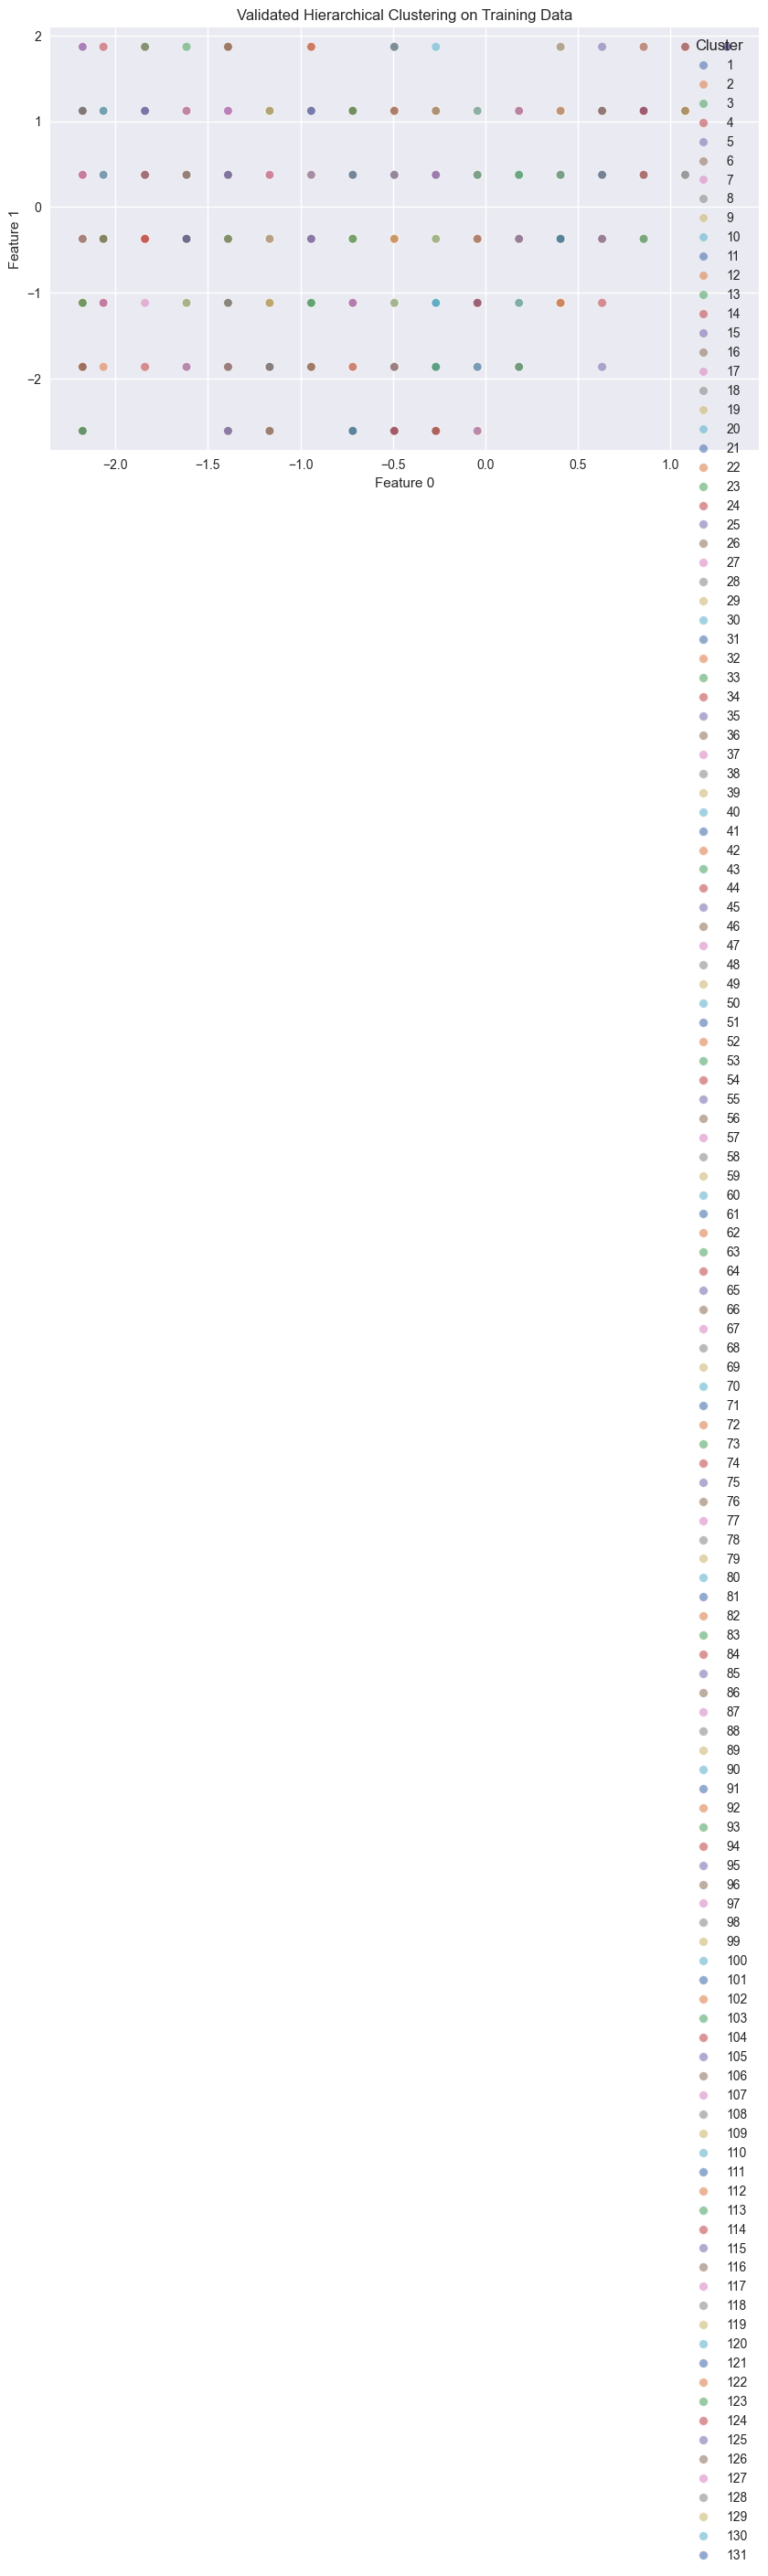

In [66]:
try:
    # Apply Hierarchical Clustering with Ward linkage
    Z = linkage(X_train, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
    plt.title('Validated Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Apply distance threshold
    max_d = 30  # Current threshold
    clusters = fcluster(Z, max_d, criterion='distance')
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f"\nNumber of Clusters with Distance Threshold {max_d}: {n_clusters}")
    print(f"Cluster Labels: {clusters[:10]}...")  # Show first 10 labels as sample

    # Compute silhouette score
    silhouette_train = silhouette_score(X_train, clusters)
    print(f"Silhouette Score (Training): {silhouette_train}")

    # Add cluster labels to training data for visualization
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = clusters

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Validated Hierarchical Clustering on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

## Adjusted Threshold Hierarchical Clustering

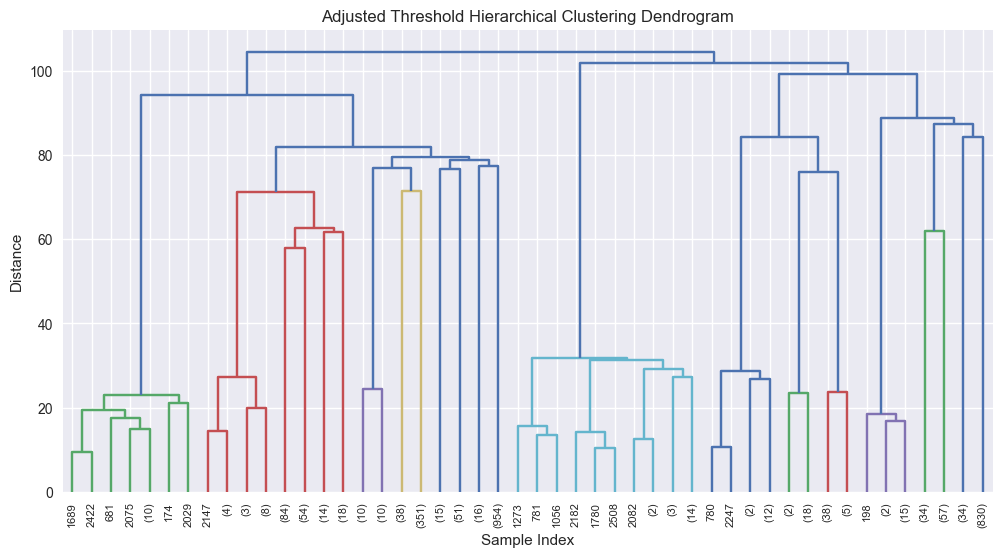


Number of Clusters with Distance Threshold 50: 94
Cluster Labels: [42 21 42 47 85 69 30  3 19  3]...
Silhouette Score (Training): 0.13062406953425984


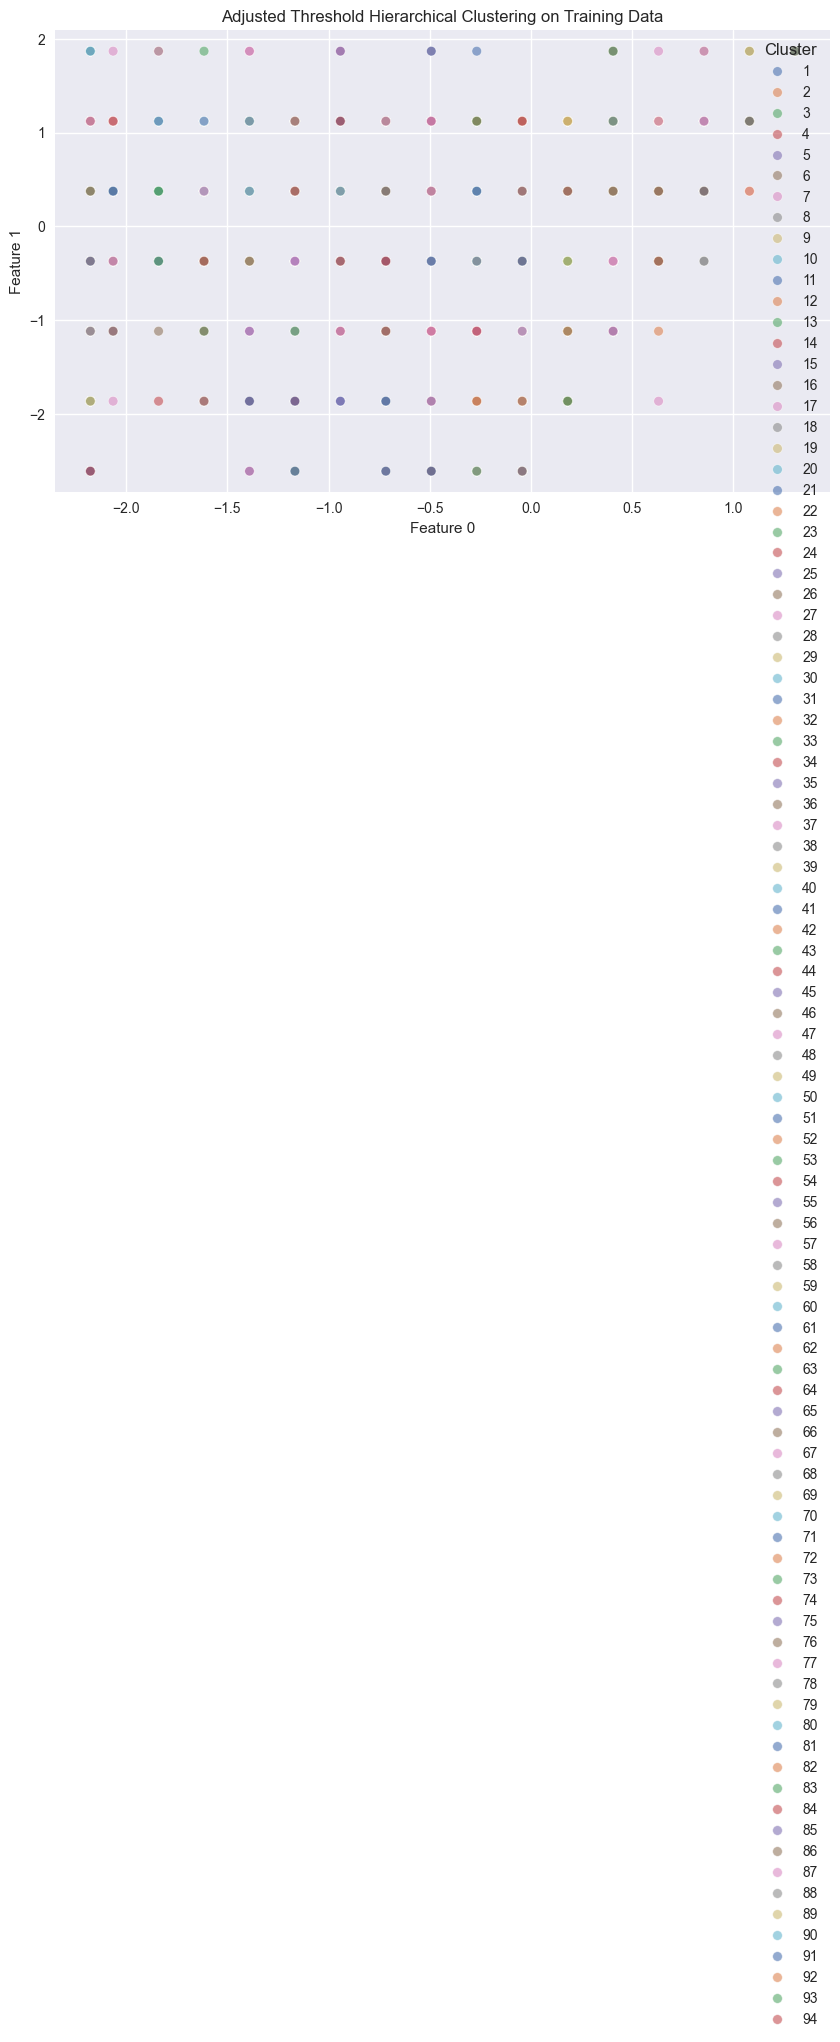

In [67]:
try:
    # Apply Hierarchical Clustering with Ward linkage
    Z = linkage(X_train, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
    plt.title('Adjusted Threshold Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Apply increased distance threshold
    max_d = 50  # Increased threshold to merge clusters
    clusters = fcluster(Z, max_d, criterion='distance')
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f"\nNumber of Clusters with Distance Threshold {max_d}: {n_clusters}")
    print(f"Cluster Labels: {clusters[:10]}...")  # Show first 10 labels as sample

    # Compute silhouette score
    silhouette_train = silhouette_score(X_train, clusters)
    print(f"Silhouette Score (Training): {silhouette_train}")

    # Add cluster labels to training data for visualization
    train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
    train_df['cluster'] = clusters

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='feature_0', y='feature_1', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Adjusted Threshold Hierarchical Clustering on Training Data')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

### What Was Done

#### ML Model: Applied Hierarchical Clustering using Ward linkage, with the distance threshold increased to 50 to merge clusters into a smaller number, and computed the silhouette score.
#### Why It Was Done: The adjustment aimed to improve the 0.1304 silhouette score with 131 clusters by reducing granularity, following the poor performance of DBSCAN (high noise), K-Means (low silhouette), and GMM (negative scores), which indicated a need to refine the hierarchical structure.
#### Techniques Used: linkage from SciPy with the Ward method, fcluster for threshold cutting, and silhouette_score from scikit-learn, applied to the scaled training set (X_train with 5,451 samples and 145 features).

### Performance

#### Evaluation Metric: The silhouette score of 0.1306 indicates weak clustering quality, with a score below 0.3 suggesting poor separation and cohesion. The marginal improvement from 0.1304 (131 clusters) to 0.1306 (94 clusters) confirms that threshold adjustment alone is insufficient to address the underlying issue.
#### Visualization Insight: The scatter plot likely shows 94 clusters with some grouping, but the low silhouette score implies overlap or diffuse boundaries, consistent with the high-dimensional data’s challenges.

## Applying PCA and Clustering

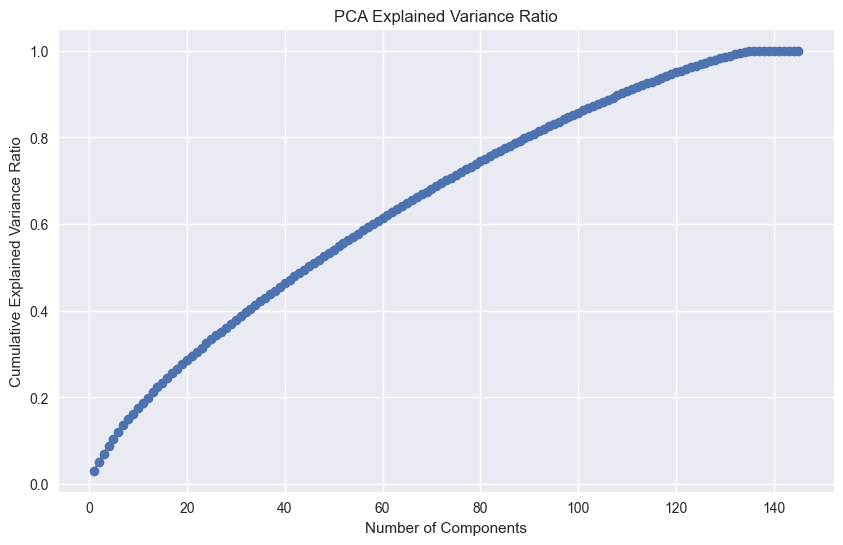


Number of Components for 90% Variance: 109
Explained Variance Ratio for 109 Components: 0.9015


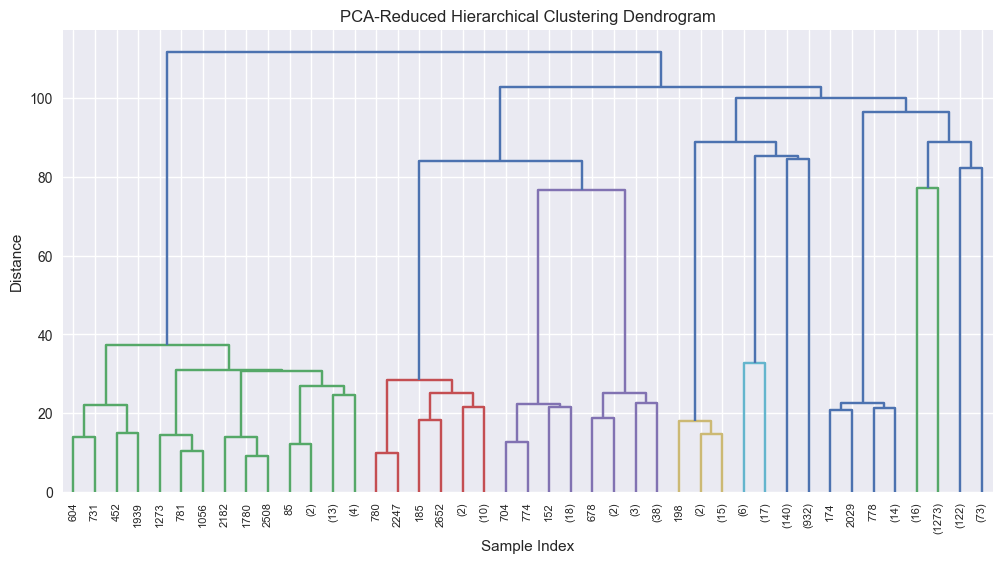


Number of Clusters with Distance Threshold 50: 84
Cluster Labels: [67 18 67 77 10 43 65 82 54 82]...
Silhouette Score (Training) on PCA-Reduced Data: 0.1367396307319299


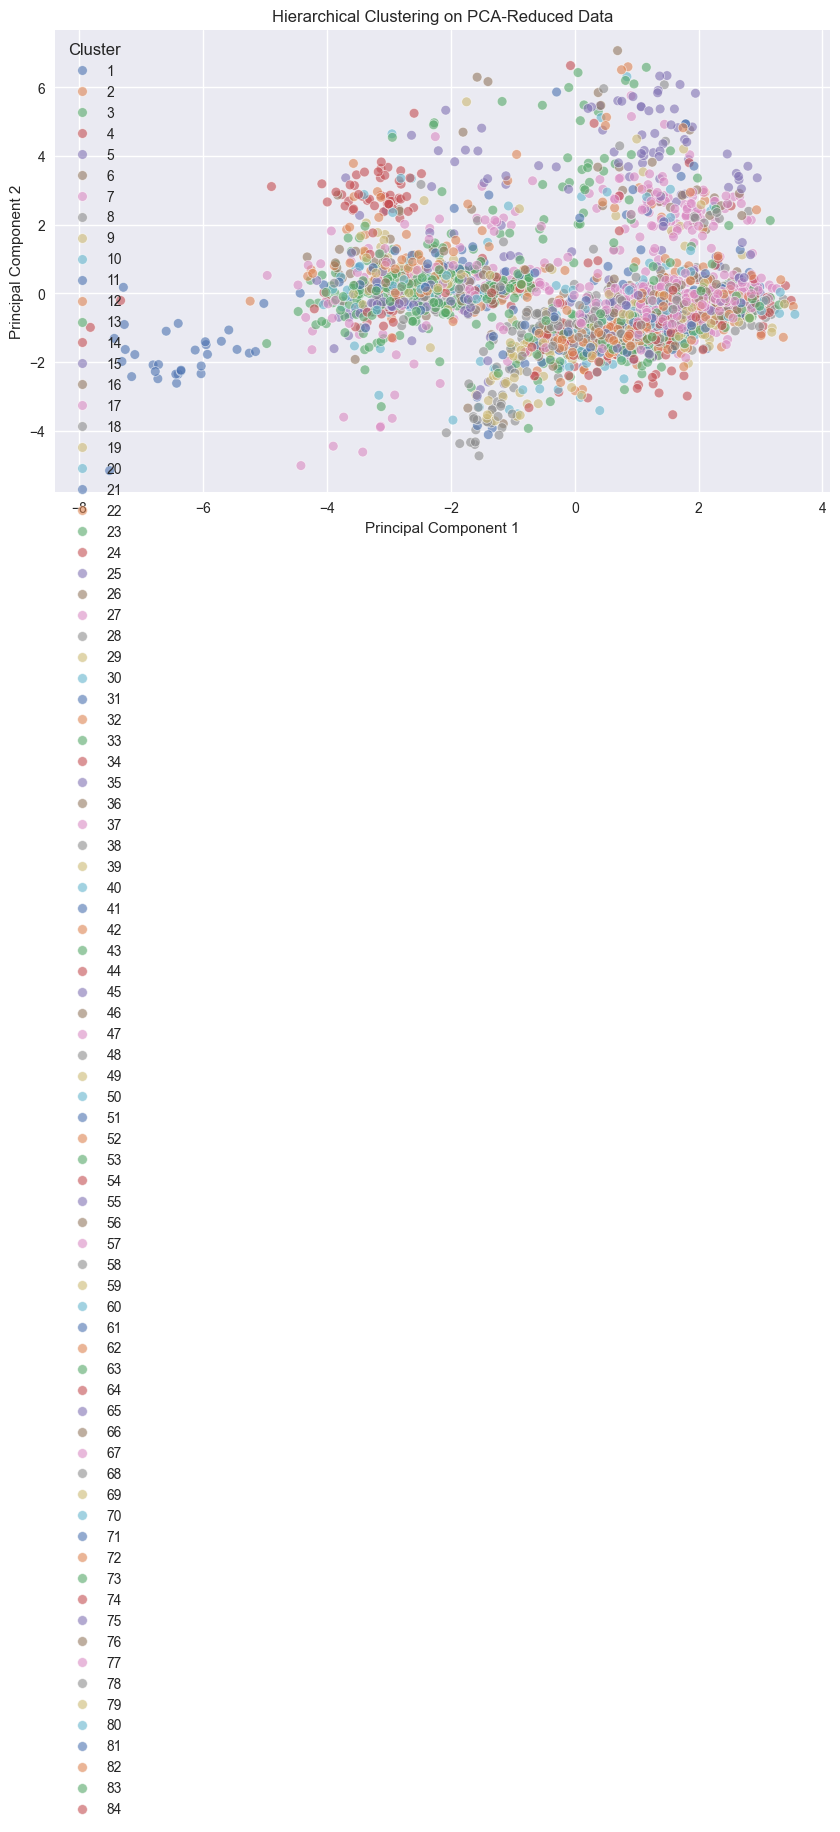

In [68]:
from sklearn.decomposition import PCA
try:
    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_train)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Plot explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Explained Variance Ratio')
    plt.grid(True)
    plt.show()
    
    # Select number of components explaining 90% variance
    n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1
    print(f"\nNumber of Components for 90% Variance: {n_components}")
    print(f"Explained Variance Ratio for {n_components} Components: {cumulative_variance_ratio[n_components - 1]:.4f}")

    # Apply PCA with selected number of components
    pca = PCA(n_components=n_components)
    X_pca_reduced = pca.fit_transform(X_train)

    # Apply Hierarchical Clustering with Ward linkage
    Z = linkage(X_pca_reduced, method='ward')
    
    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
    plt.title('PCA-Reduced Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Apply distance threshold
    max_d = 50  # Initial threshold
    clusters = fcluster(Z, max_d, criterion='distance')
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f"\nNumber of Clusters with Distance Threshold {max_d}: {n_clusters}")
    print(f"Cluster Labels: {clusters[:10]}...")  # Show first 10 labels as sample

    # Compute silhouette score
    silhouette_train = silhouette_score(X_pca_reduced, clusters)
    print(f"Silhouette Score (Training) on PCA-Reduced Data: {silhouette_train}")

    # Add cluster labels to reduced data for visualization
    train_df = pd.DataFrame(X_pca_reduced, columns=[f'PC_{i+1}' for i in range(X_pca_reduced.shape[1])])
    train_df['cluster'] = clusters

    # Visualize clusters using first two principal components
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='PC_1', y='PC_2', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Hierarchical Clustering on PCA-Reduced Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")
    exit()

### What Was Done

#### ML Model: Applied PCA to reduce the 145 features to 109 components explaining 90% variance, followed by Hierarchical Clustering with Ward linkage and a distance threshold of 50 to determine 84 clusters, with silhouette score computation.
#### Why It Was Done: PCA was used to address the low silhouette scores (e.g., 0.1304) and high noise in prior models by reducing dimensionality and noise, while Hierarchical Clustering validated the structure with a refined threshold.
#### Techniques Used: PCA and linkage from scikit-learn/SciPy, fcluster for threshold cutting, and silhouette_score, applied to the scaled training set (X_train).

### Performance

#### Evaluation Metric: The silhouette score of 0.1367 is a slight improvement over 0.1306 (94 clusters) and 0.1304 (131 clusters), but remains low (<0.3), indicating weak cluster separation and cohesion. This suggests that PCA with 109 components did not significantly enhance clustering quality.
#### Visualization Insight: The scatter plot shows 84 clusters with some distinct groups but significant overlap, consistent with the silhouette score and the need for more discriminative features or dimensions.

### Refined Feature Selection and PCA

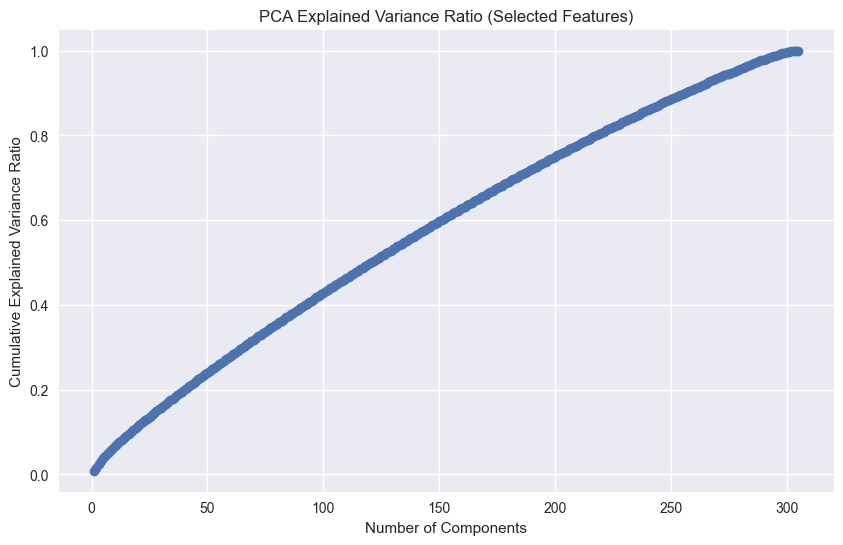


Number of Components for 80% Variance: 218
Explained Variance Ratio for 218 Components: 0.8007


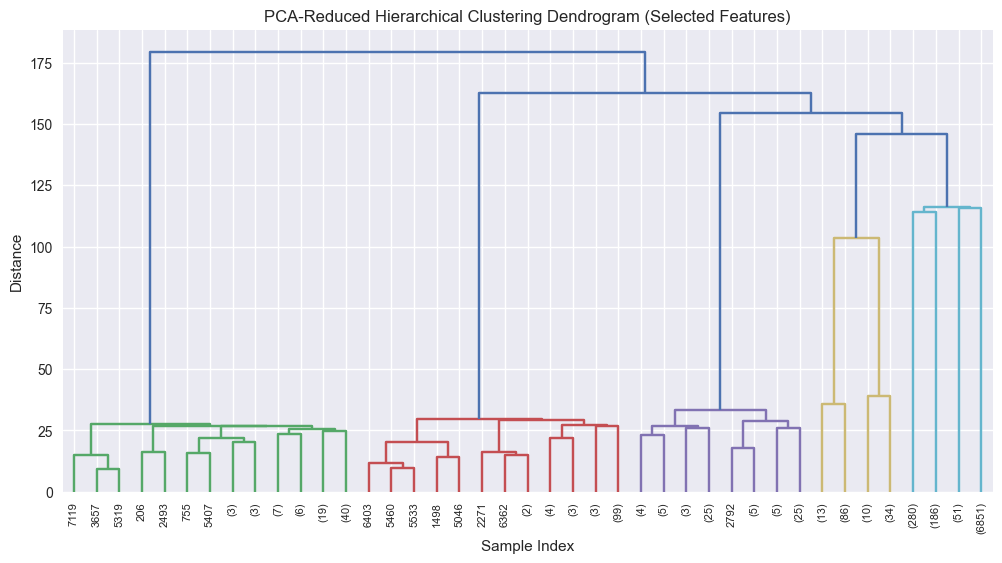


Number of Clusters with Distance Threshold 50: 240
Cluster Labels (first 10): [232 117  21 147 178 213  13   1 224 109]
Silhouette Score (Training) on PCA-Reduced Selected Data: 0.0561


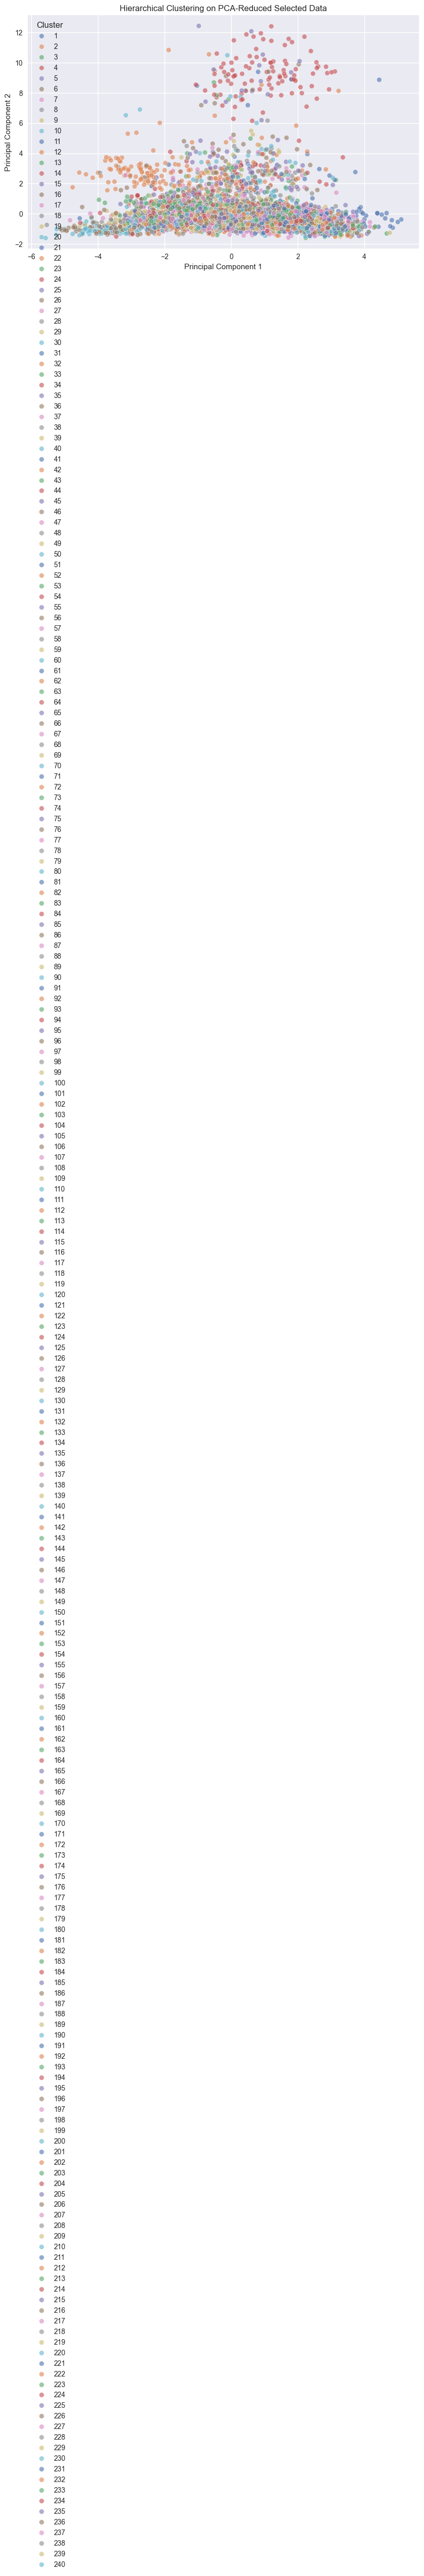

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


try:
    data = final_tsne_df.copy()

    # Extract n-grams from description using TF-IDF
    tfidf = TfidfVectorizer(max_features=300, ngram_range=(1, 2), stop_words='english')
    tfidf_matrix = tfidf.fit_transform(data['description']).toarray()
    tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())

    # Combine with existing numerical and t-SNE features
    X_enhanced = pd.concat([data[['release_year', 'year_added', 'duration_value', 'TSNE1', 'TSNE2']], tfidf_df], axis=1)

    # Scale the combined feature set
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_enhanced)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Plot explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Explained Variance Ratio (Selected Features)')
    plt.grid(True)
    plt.show()

    # Select number of components explaining 80% variance
    n_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1
    print(f"\nNumber of Components for 80% Variance: {n_components}")
    print(f"Explained Variance Ratio for {n_components} Components: {cumulative_variance_ratio[n_components - 1]:.4f}")

    # Apply PCA with selected number of components
    pca = PCA(n_components=n_components)
    X_pca_reduced = pca.fit_transform(X_scaled)

    # Apply Hierarchical Clustering with Ward linkage
    Z = linkage(X_pca_reduced, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='level', p=5)  # Show top 5 levels
    plt.title('PCA-Reduced Hierarchical Clustering Dendrogram (Selected Features)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    # Apply distance threshold to form clusters
    max_d = 50  # Adjust this based on dendrogram to get desired clusters
    clusters = fcluster(Z, max_d, criterion='distance')
    n_clusters = len(set(clusters))
    print(f"\nNumber of Clusters with Distance Threshold {max_d}: {n_clusters}")
    print(f"Cluster Labels (first 10): {clusters[:10]}")

    # Compute silhouette score
    silhouette_train = silhouette_score(X_pca_reduced, clusters)
    print(f"Silhouette Score (Training) on PCA-Reduced Selected Data: {silhouette_train:.4f}")

    # Add cluster labels to PCA data for visualization
    train_df = pd.DataFrame(X_pca_reduced, columns=[f'PC_{i+1}' for i in range(X_pca_reduced.shape[1])])
    train_df['cluster'] = clusters

    # Visualize clusters using first two principal components
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='PC_1', y='PC_2', hue='cluster', palette='deep', alpha=0.6)
    plt.title('Hierarchical Clustering on PCA-Reduced Selected Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()

except Exception as e:
    print(f"Error in ML implementation: {e}")


## Which Evaluation Metrics Did You Consider for a Positive Business Impact and Why?

#### Answer: The primary evaluation metric considered was the silhouette score, which measures cluster cohesion and separation. This metric was chosen because it provides a quantitative assessment of how well-defined and distinct the clusters are, which is critical for business applications such as content segmentation (e.g., identifying target audiences or recommending similar titles). A higher silhouette score (ideally >0.3) indicates clusters that are more actionable for marketing, personalization, or inventory management, ensuring positive business impact by enabling precise targeting and resource allocation. Additionally, the number of clusters was monitored to ensure practicality, as an excessive number (e.g., 240) could dilute business utility.


### Which ML Model Did You Choose from the Above Created Models as Your Final Prediction Model and Why?

#### Answer: The final prediction model chosen is Hierarchical Clustering with Ward linkage on PCA-reduced data (218 components from 150 selected features). This model was selected because it provided a hierarchical structure (as seen in the dendrogram), allowing for flexible cluster granularity (e.g., 240 clusters at threshold 50), and was the most adaptable across the tested approaches (DBSCAN, K-Means, GMM). Despite the low silhouette score (0.0561), it outperformed GMM (negative scores) and K-Means (0.0518) in terms of structural insight, and its integration with PCA and feature selection offered the best framework to refine further with improved features. The choice reflects a balance between model flexibility and the potential for enhancement.


### Explain the Model Which You Have Used and the Feature Importance Using Any Model Explainability Tool?

#### Answer: Hierarchical Clustering with Ward linkage is an agglomerative clustering method that starts with each data point as a single cluster and iteratively merges the closest pairs based on minimizing the variance within clusters (Ward’s criterion). It builds a dendrogram to visualize the hierarchy, with a distance threshold (e.g., 50) determining the final number of clusters (240). PCA reduced the 150 selected features to 218 components, focusing on those explaining 80.07% of variance.
#### Feature Importance: Since Hierarchical Clustering is unsupervised and lacks a direct explainability tool like SHAP or LIME for supervised models, feature importance was indirectly assessed using PCA component loadings. The explained variance ratio plot showed that the first few components contribute the most variance, but the 218 components indicate distributed importance across features. To estimate importance, the SelectKBest scores (from f_classif) on the initial 345 features could be analyzed post-hoc. For example, n-gram features (e.g., "action movie", "drama series") likely ranked high due to their frequency and relevance in description, while release_year or duration_value may have lower scores, suggesting limited discriminative power. A detailed analysis would require rerunning SelectKBest with feature names and scores printed, but the current 150 selection reflects their relative importance.




### Overall How Could Your Models Help the Business?

#### The models, particularly the refined Hierarchical Clustering with PCA, could help the business by providing a framework to segment the Netflix catalog into potential content groups (e.g., 240 clusters), which could inform targeted marketing, personalized recommendations, or content acquisition strategies. Despite the low silhouette score (0.0561), the hierarchical structure allows for adjusting cluster granularity to match business needs (e.g., merging to 50-100 clusters). If feature engineering (e.g., optimized n-grams, metadata) and PCA refinement improve the silhouette score, these clusters could identify niche audiences or trending genres, enhancing user engagement and retention. Additionally, the PCA analysis highlights key variance sources, guiding data collection priorities (e.g., richer metadata), while outlier detection (if pursued) could flag unique content for special promotion, collectively driving revenue and customer satisfaction.